# __05 Exploratory Data Analysis__

In [1]:
# libraries
library(tidyverse)

# config
repr_html.tbl_df <- function(obj, ..., rows = 6) repr:::repr_html.data.frame(obj, ..., rows = rows)
options(dplyr.summarise.inform = FALSE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



This chapter will show you how to use visualization and transforma‐
tion to explore your data in a systematic way, a task that statisticians
call exploratory data analysis, or EDA for short. EDA is an iterative
cycle. You:
1. Generate questions about your data.
2. Search for answers by visualizing, transforming, and modeling
your data.
3. Use what you learn to refine your questions and/or generate
new questions.

EDA is an important part of any data analysis, even if the questions
are handed to you on a platter, because you always need to investi‐
gate the quality of your data. Data cleaning is just one application of
EDA: you ask questions about whether or not your data meets your
expectations. To do data cleaning, you’ll need to deploy all the tools
of EDA: visualization, transformation, and modeling.

Your goal during EDA is to develop an understanding of your data.
The easiest way to do this is to use questions as tools to guide your
investigation. When you ask a question, the question focuses your
attention on a specific part of your dataset and helps you decide
which graphs, models, or transformations to make.

EDA is fundamentally a creative process. And like most creative
processes, the key to asking quality questions is to generate a large
quantity of questions. It is difficult to ask revealing questions at the
start of your analysis because you do not know what insights are
contained in your dataset. On the other hand, each new question
that you ask will expose you to a new aspect of your data and
increase your chance of making a discovery. You can quickly drill
down into the most interesting parts of your data—and develop a set
of thought-provoking questions—if you follow up each question
with a new question based on what you find.

There is no rule about which questions you should ask to guide your
research. However, two types of questions will always be useful for
making discoveries within your data. You can loosely word these
questions as:

1. What type of variation occurs within my variables?
2. What type of covariation occurs between my variables?

## __Variation__

Variation is the tendency of the values of a variable to change from
measurement to measurement. You can see variation easily in real
life; if you measure any continuous variable twice, you will get two
different results. This is true even if you measure quantities that are
constant, like the speed of light. Each of your measurements will
include a small amount of error that varies from measurement to
measurement. Categorical variables can also vary if you measure
across different subjects (e.g., the eye colors of different people), or
different times (e.g., the energy levels of an electron at different
moments). Every variable has its own pattern of variation, which
can reveal interesting information. The best way to understand that
pattern is to visualize the distribution of variables’ values.

### Visualizing Distributions

How you visualize the distribution of a variable will depend on
whether the variable is categorical or continuous. A variable is cate‐
gorical if it can only take one of a small set of values. In R, categorical variables are usually saved as factors or character vectors. To
examine the distribution of a categorical variable, use a bar chart:

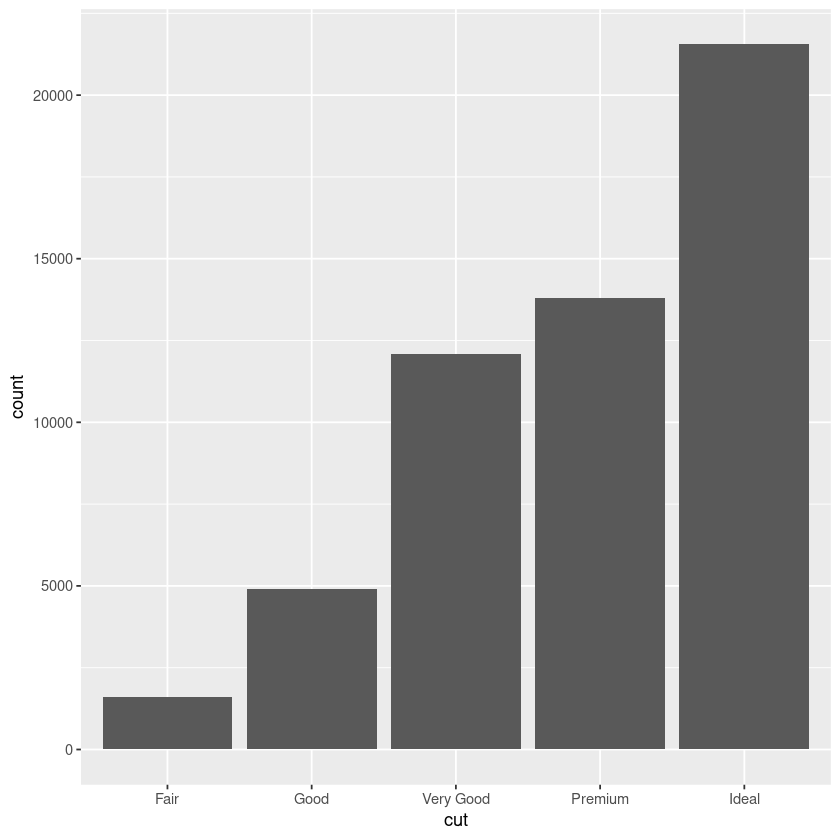

In [2]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut))

A variable is continuous if it can take any of an infinite set of ordered
values. Numbers and date-times are two examples of continuous
variables. To examine the distribution of a continuous variable, use a
histogram:

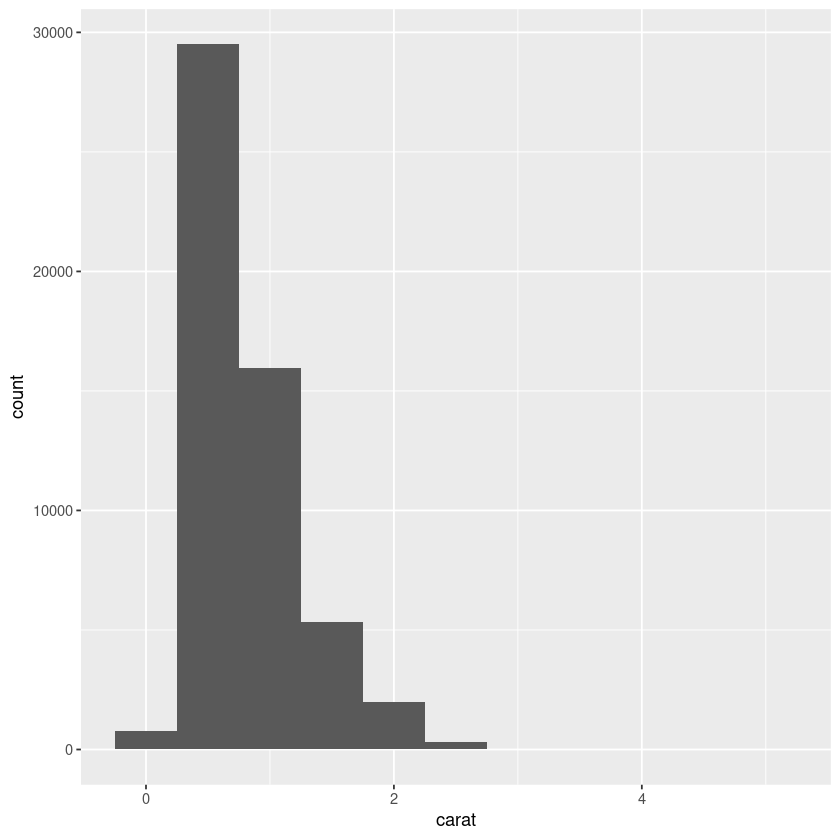

In [4]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = carat), binwidth = 0.5)

A histogram divides the x-axis into equally spaced bins and then
uses the height of each bar to display the number of observations
that fall in each bin. In the preceding graph, the tallest bar shows
that almost 30,000 observations have a carat value between 0.25
and 0.75, which are the left and right edges of the bar.

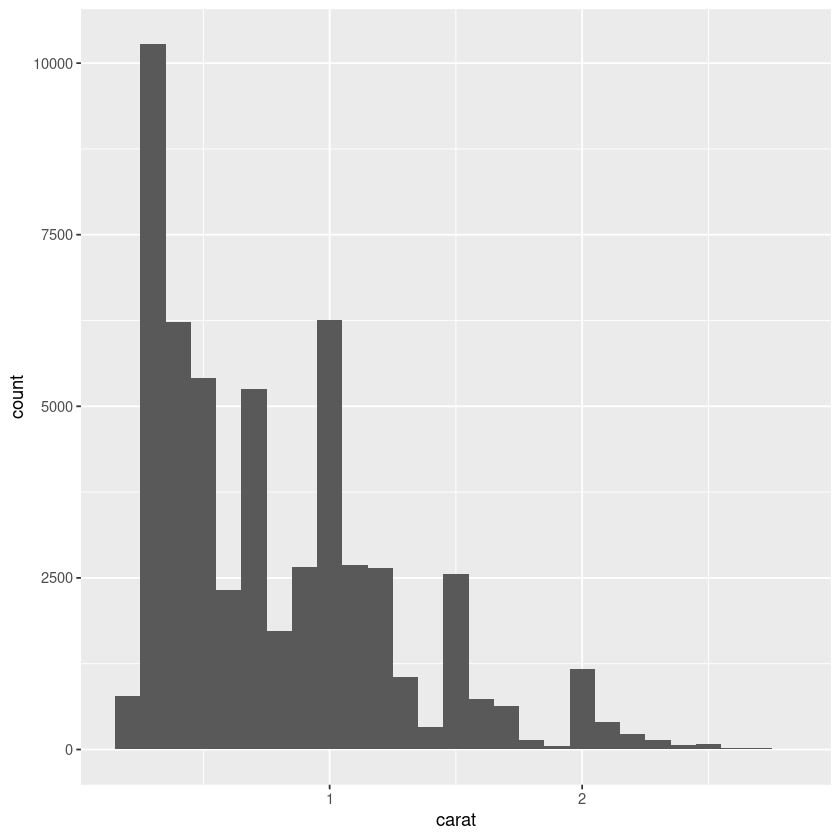

In [5]:
# can adjust parameters
smaller <- diamonds %>%
    filter(carat < 3)

ggplot(data = smaller, mapping = aes(x = carat)) +
    geom_histogram(binwidth = 0.1)

If you wish to overlay multiple histograms in the same plot, use `geom_freqpoly()` instead of `geom_histogram()` .
`geom_freqpoly()` performs the same calculation as `geom_histogram()` , but instead of displaying the counts with bars, uses lines
instead. It’s much easier to understand overlapping lines than bars:

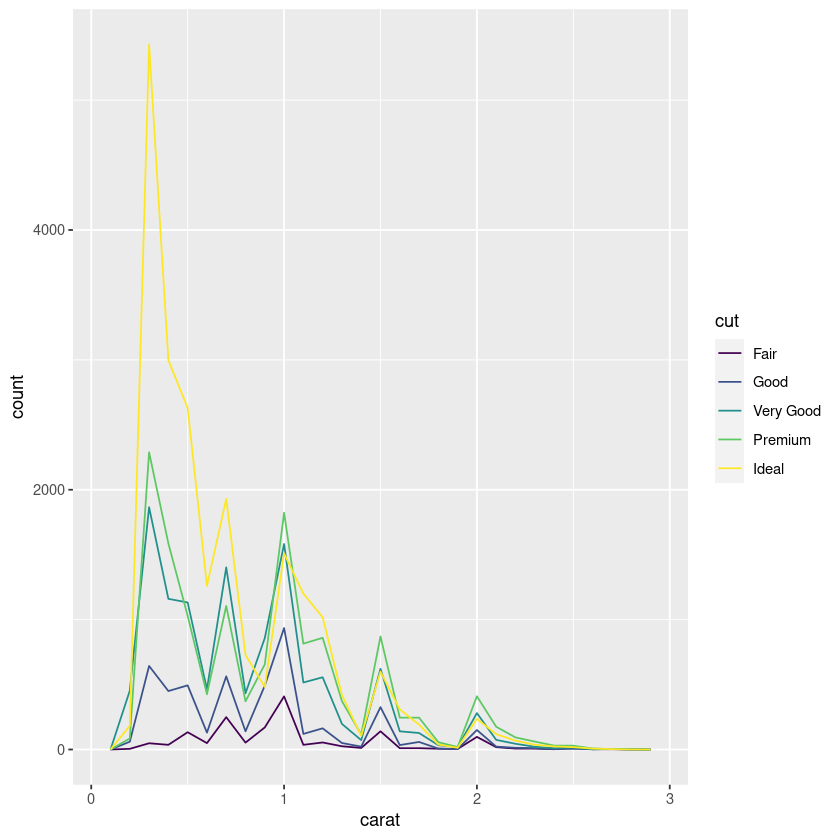

In [6]:
ggplot(data = smaller, mapping = aes(x = carat, color = cut)) +
    geom_freqpoly(binwidth = 0.1)

### __Typical Values__

In both bar charts and histograms, tall bars show the common val‐
ues of a variable, and shorter bars show less-common values. Places
that do not have bars reveal values that were not seen in your data.
To turn this information into useful questions, look for anything
unexpected:
* Which values are the most common? Why?
* Which values are rare? Why? Does that match your expecta‐
tions?
* Can you see any unusual patterns? What might explain them?

As an example, the following histogram suggests several interesting
questions:
* Why are there more diamonds at whole carats and common
fractions of carats?
* Why are there more diamonds slightly to the right of each peak
than there are slightly to the left of each peak?
* Why are there no diamonds bigger than 3 carats?

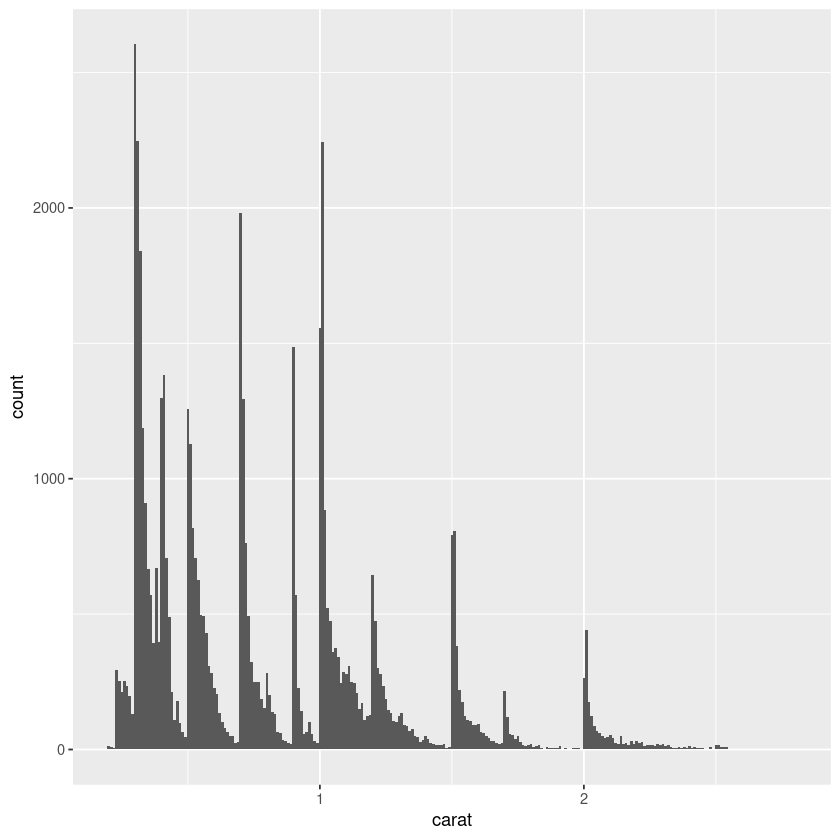

In [8]:
ggplot(data = smaller, mapping = aes(x = carat)) +
    geom_histogram(binwidth = 0.01)

In general, clusters of similar values suggest that subgroups exist in
your data. To understand the subgroups, ask:
* How are the observations within each cluster similar to each
other?
* How are the observations in separate clusters different from
each other?
* How can you explain or describe the clusters?
* Why might the appearance of clusters be misleading?

The following histogram shows the length (in minutes) of 272 eruptions of the Old Faithful Geyser in Yellowstone National Park. Eruption times appear to be clustered into two groups: there are short
eruptions (of around 2 minutes) and long eruptions (4–5 minutes),
but little in between:

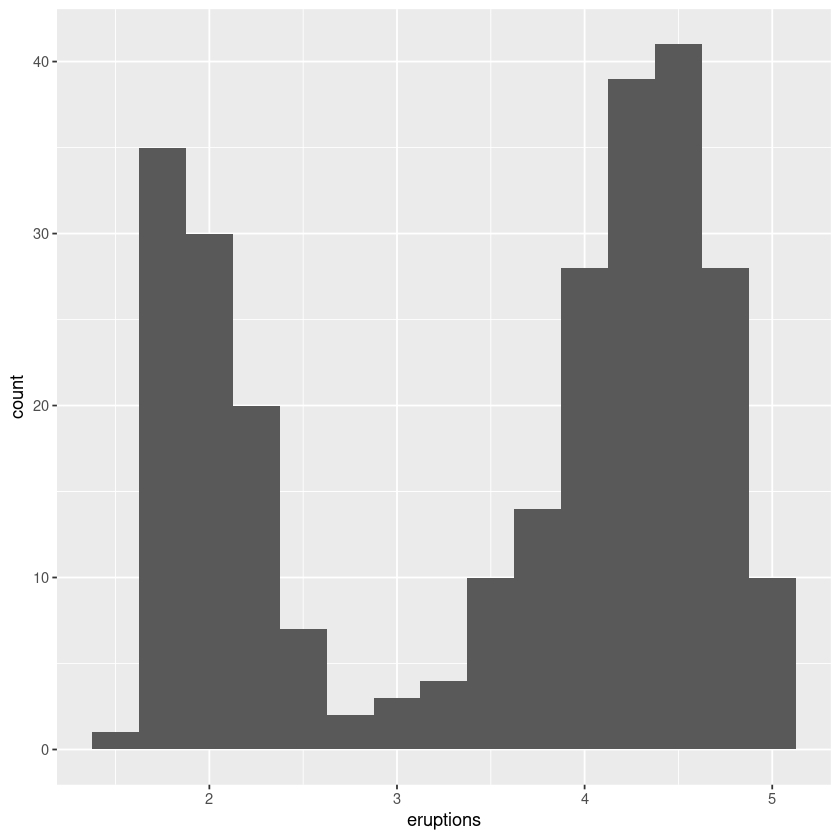

In [9]:
ggplot(data = faithful, mapping = aes(x = eruptions)) +
    geom_histogram(binwidth = 0.25)

Many of the preceding questions will prompt you to explore a rela‐
tionship between variables, for example, to see if the values of one
variable can explain the behavior of another variable.

### __Unusual Values__

Outliers are observations that are unusual; data points that don’t
seem to fit the pattern. Sometimes outliers are data entry errors;
other times outliers suggest important new science. When you have
a lot of data, outliers are sometimes difficult to see in a histogram.
For example, take the distribution of the y variable from the diamonds dataset. The only evidence of outliers is the unusually wide
limits on the y-axis:

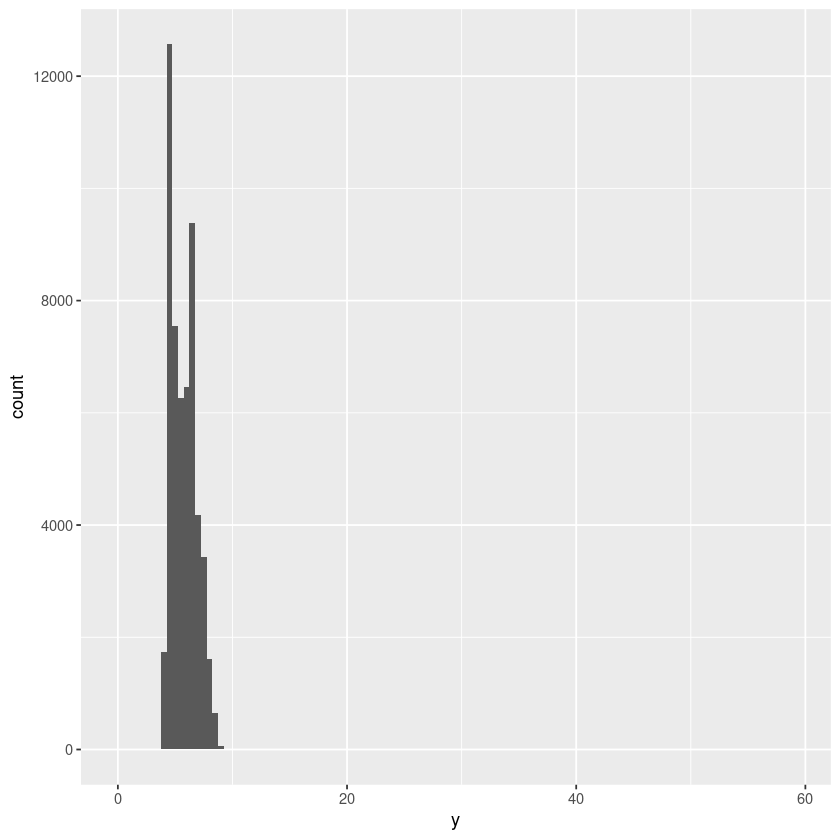

In [10]:
ggplot(diamonds) +
    geom_histogram(mapping = aes(x = y), binwidth = 0.5)

There are so many observations in the common bins that the rare
bins are so short that you can’t see them (although maybe if you
stare intently at 0 you’ll spot something). To make it easy to see the
unusual values, we need to zoom in to small values of the y-axis with
`coord_cartesian()` :

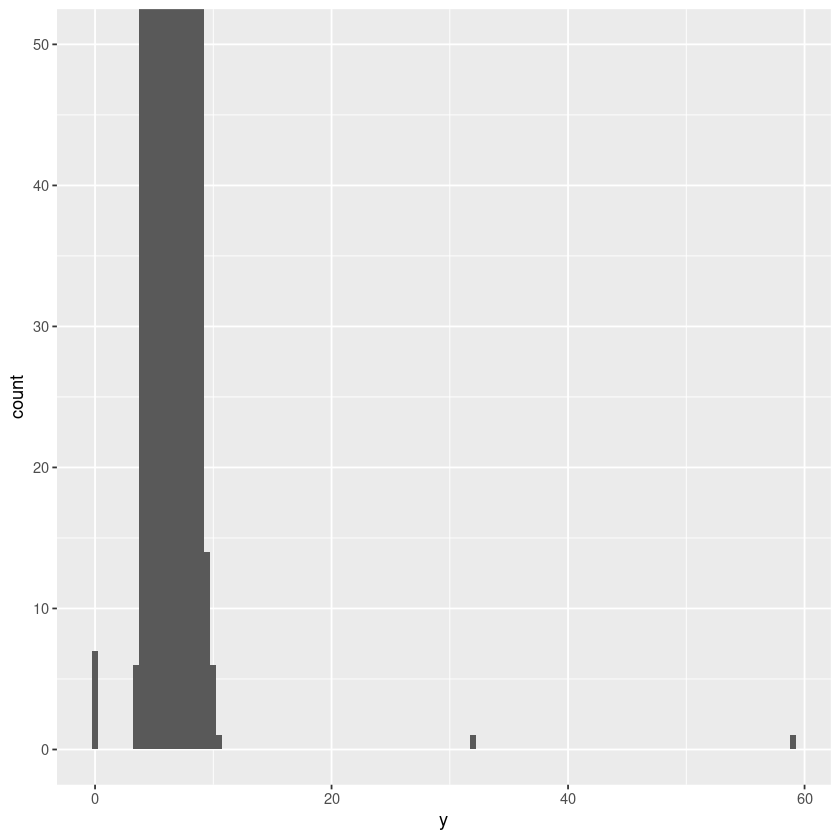

In [11]:
ggplot(diamonds) +
    geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
    coord_cartesian(ylim = c(0, 50))

This allows us to see that there are three unusual values: 0, ~30, and
~60. We pluck them out with dplyr:

In [12]:
unusual <- diamonds %>%
    filter(y < 3 | y > 20) %>%
    arrange(y)

(unusual)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.00,Very Good,H,VS2,63.3,53,5139,0,0,0
1.14,Fair,G,VS1,57.5,67,6381,0,0,0
1.56,Ideal,G,VS2,62.2,54,12800,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.71,Good,F,SI2,64.1,60,2130,0.00,0.0,0.00
0.51,Ideal,E,VS1,61.8,55,2075,5.15,31.8,5.12
2.00,Premium,H,SI2,58.9,57,12210,8.09,58.9,8.06


The y variable measures one of The y variable measures one of the three dimensions of these dia‐
monds, in mm. We know that diamonds can’t have a width of 0mm,
so these values must be incorrect. We might also suspect that measurements of 32mm and 59mm are implausible: those diamonds are
over an inch long, but don’t cost hundreds of thousands of dollars!
It’s good practice to repeat your analysis with and without the outliers. If they have minimal effect on the results, and you can’t figure
out why they’re there, it’s reasonable to replace them with missing
values and move on. However, if they have a substantial effect on
your results, you shouldn’t drop them without justification. You’ll
need to figure out what caused them (e.g., a data entry error) and
disclose that you removed them in your write-up.the three dimensions of these diamonds, in mm. We know that diamonds can’t have a width of 0mm,
so these values must be incorrect. We might also suspect that measurements of 32mm and 59mm are implausible: those diamonds are
over an inch long, but don’t cost hundreds of thousands of dollars!
It’s good practice to repeat your analysis with and without the outliers. If they have minimal effect on the results, and you can’t figure
out why they’re there, it’s reasonable to replace them with missing
values and move on. However, if they have a substantial effect on
your results, you shouldn’t drop them without justification. You’ll
need to figure out what caused them (e.g., a data entry error) and
disclose that you removed them in your write-up.

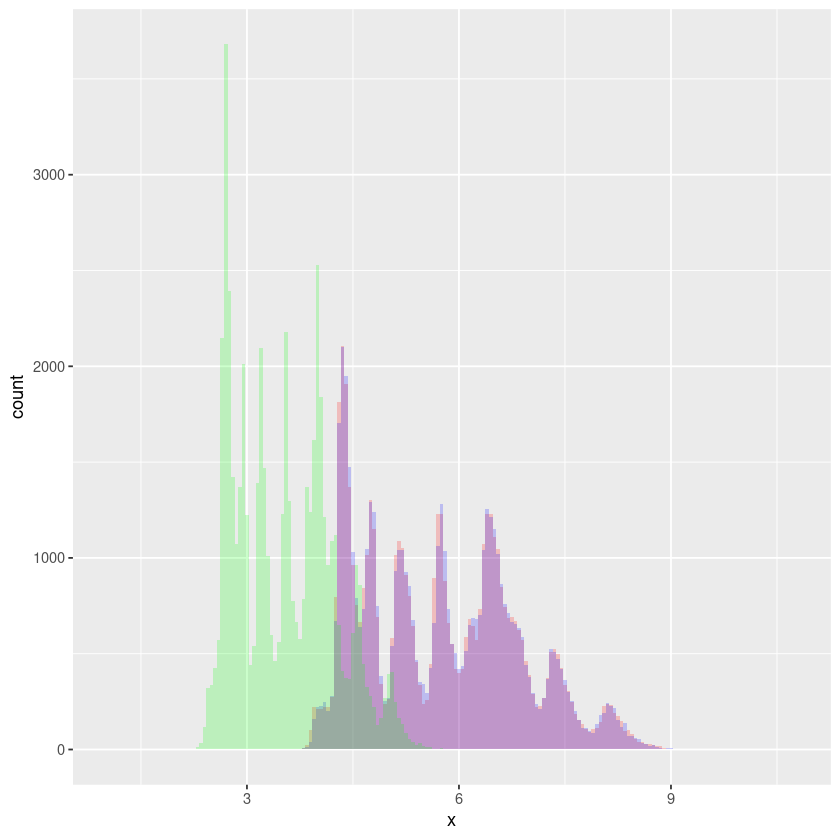

In [49]:
# Explore the distribution of each of the x , y , and z variables in
# diamonds . What do you learn? Think about a diamond and how
# you might decide which dimension is the length, width, and
# depth.
usual <- diamonds %>%
    filter(y >= 1 & y < 20) %>%
    filter(x >= 1 & x < 20) %>%
    filter(z >= 1 & z < 20) %>%
    arrange(y)

ggplot(data = usual) +
    geom_histogram(mapping = aes(x = x),
                   binwidth = 0.05,
                   fill = 'red',
                   alpha = 0.2) +
    geom_histogram(mapping = aes(x = y),
                   binwidth = 0.05,
                   fill = 'blue',
                   alpha = 0.2) +
    geom_histogram(mapping = aes(x = z),
                   binwidth = 0.05,
                   fill = 'green',
                   alpha = 0.2)

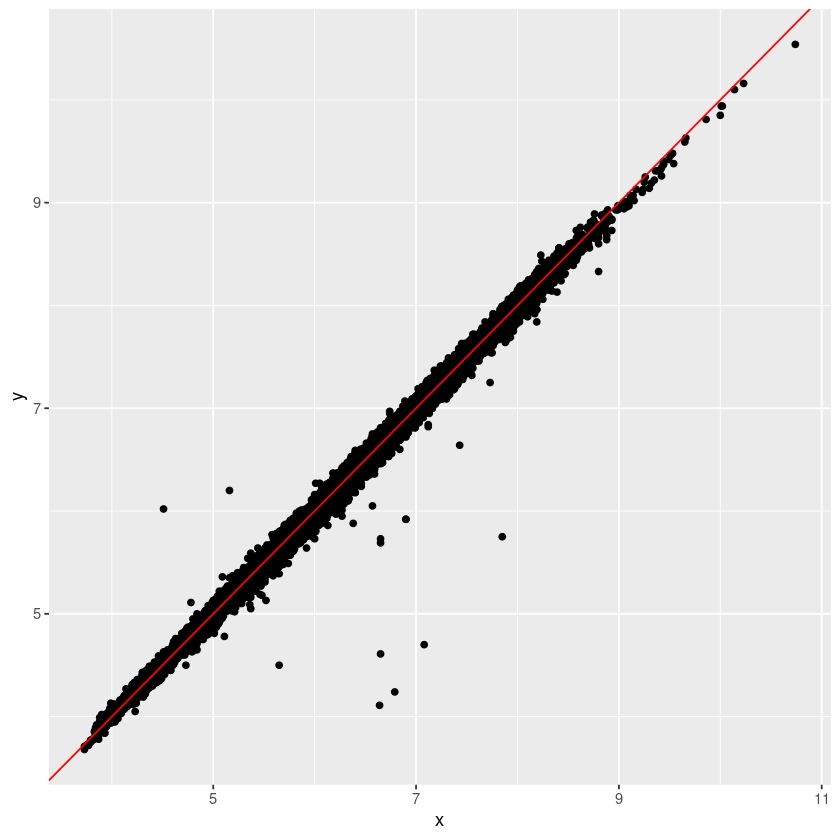

In [41]:
ggplot(data = usual) +
    geom_point(aes(x = x, y = y)) +
    geom_abline(slope = 1,
                color = 'red')

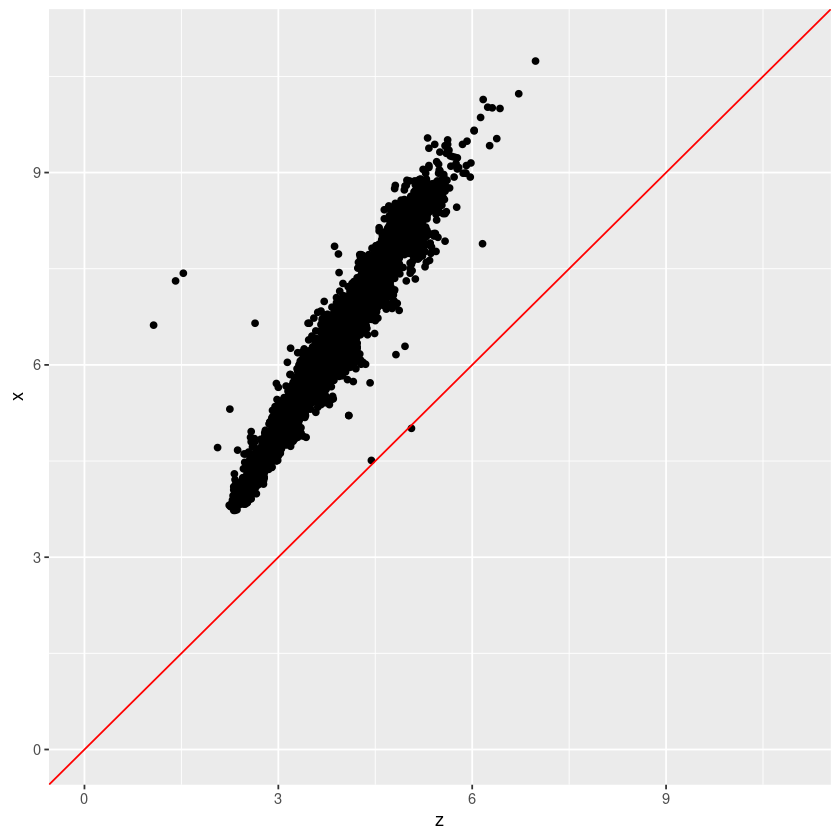

In [48]:
ggplot(data = usual) +
    geom_point(aes(x = z, y = x)) +
    geom_abline(slope = 1,
                color = 'red') +
    xlim(0, 11) +
    ylim(0, 11)

I think x and y can be width and length because normally diamonds are simmetric in their face shape.
The z seems smaller compared to x and y, probably being the depth because of the usage of the diamonds in
adornments (normally we see the face of the diamond in jewelry).

Warning message:
“Removed 26398 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


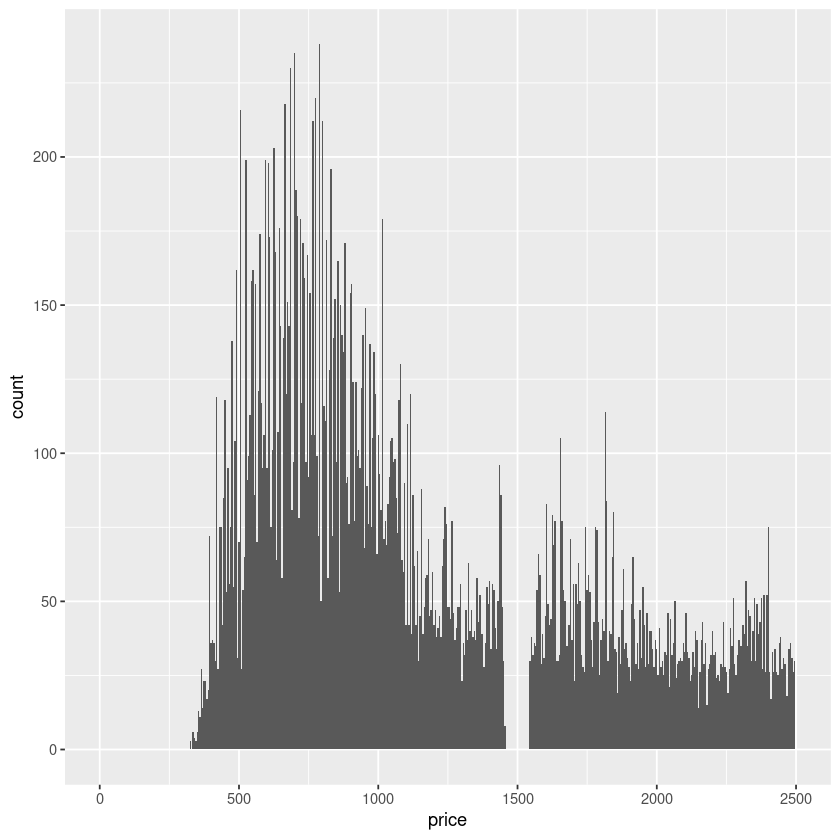

In [53]:
# Explore the distribution of price . Do you discover anything
# unusual or surprising? (Hint: carefully think about the bin
# width and make sure you try a wide range of values.)
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = price),
                   binwidth = 5) +
    xlim(0, 2500)

Yes, it looks that there are no diamonds with the price around 1500.

Warning message:
“Removed 43609 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


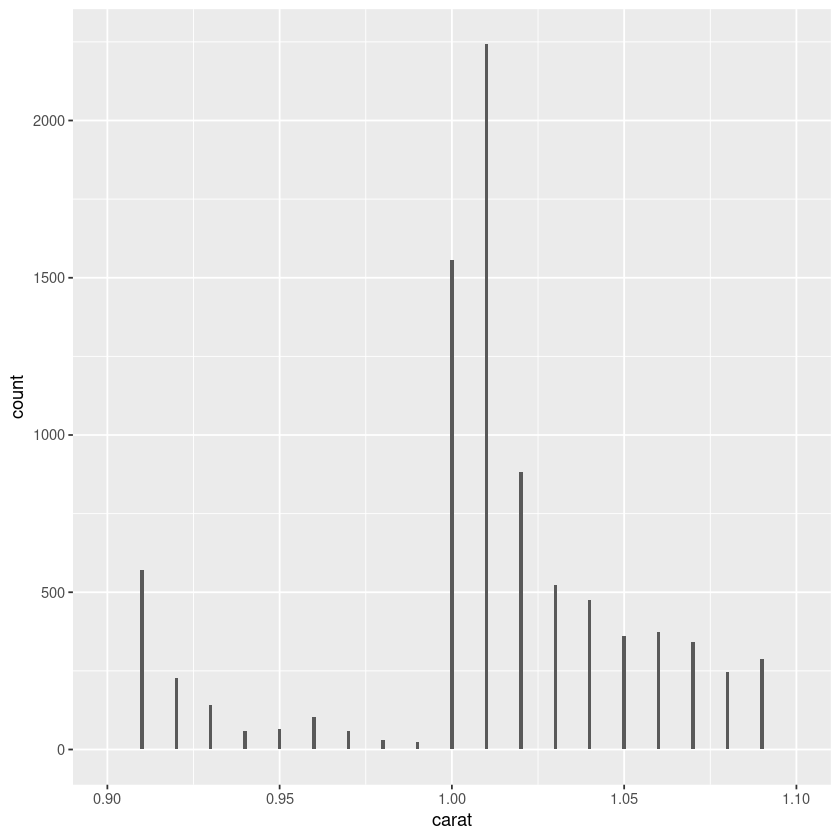

In [57]:
# How many diamonds are 0.99 carat? How many are 1 carat?
# What do you think is the cause of the difference?
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = carat),
                   binwidth = 0.001) +
    xlim(0.90, 1.10)

In [59]:
(usual %>%
    count(carat == 1))

(usual %>%
    count(carat == 0.99))

carat == 1,n
<lgl>,<int>
FALSE,52361
TRUE,1556


carat == 0.99,n
<lgl>,<int>
FALSE,53894
TRUE,23


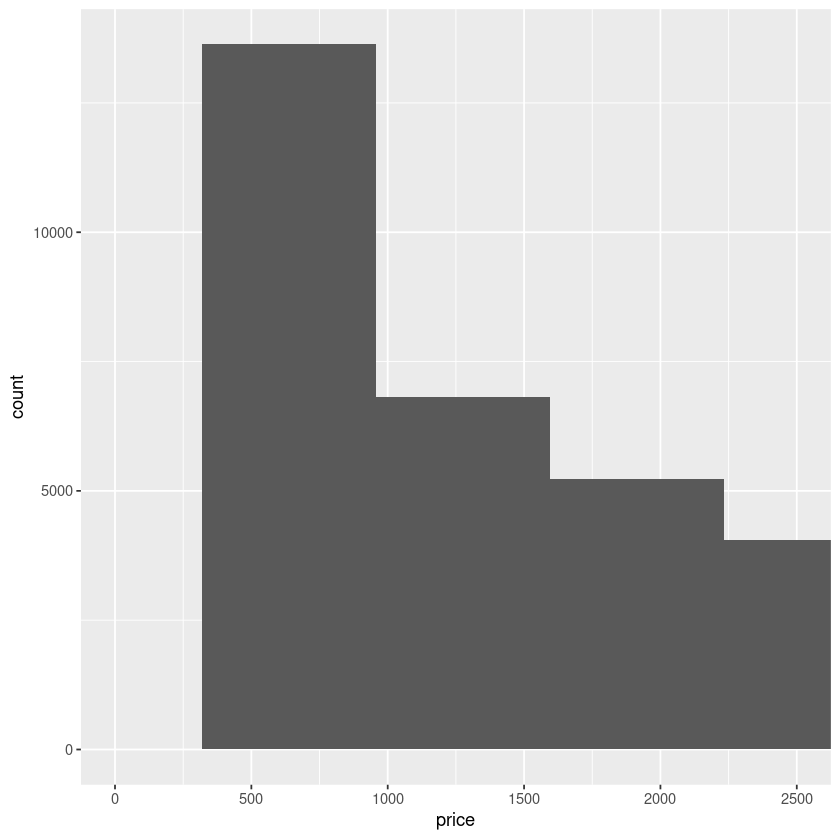

In [68]:
# Compare and contrast coord_cartesian() versus xlim() or
# ylim() when zooming in on a histogram. What happens if you
# leave binwidth unset? What happens if you try and zoom so
# only half a bar shows?
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = price),
                   bins = 30) +
    coord_cartesian(xlim = c(0, 2500))

Warning message:
“Removed 26398 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


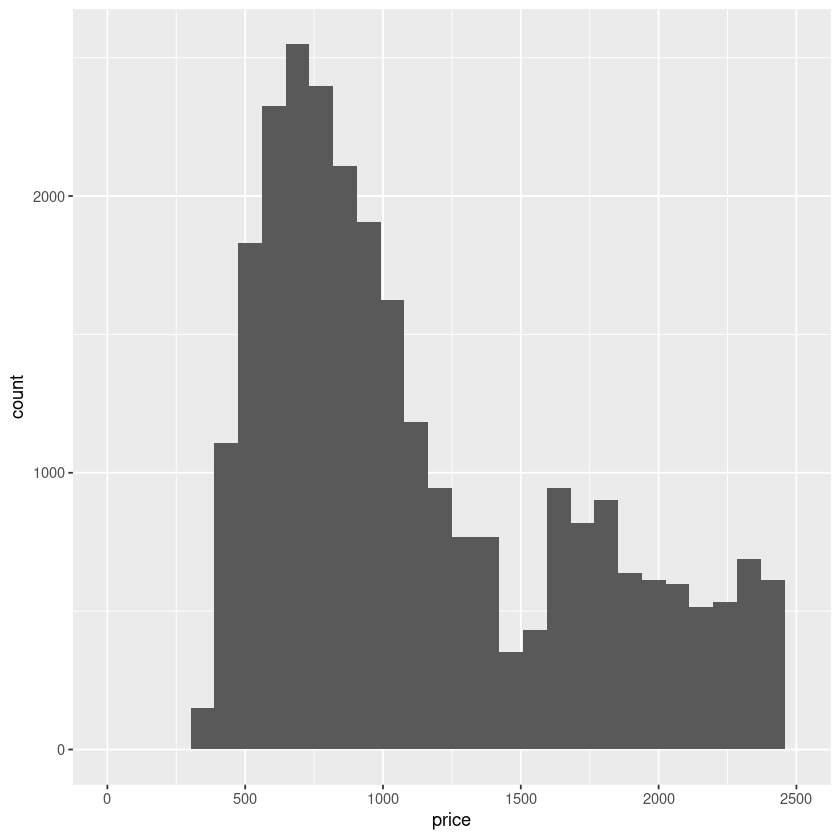

In [69]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = price),
                   bins = 30) +
    xlim(0, 2500)

geom_cartesian zooms after computing, xlim affects the computations as we can see
that there are 30 bins between 0 and 2500, and not between all the price range (as in geom_cartesian)

### __Missing Values__

If you’ve encountered unusual values in your dataset, and simply
want to move on to the rest of your analysis, you have two options:
- Drop the entire row with the strange values:
    I don’t recommend this option as just because one measurement
is invalid, doesn’t mean all the measurements are. Additionally,
if you have low-quality data, by time that you’ve applied this
approach to every variable you might find that you don’t have
any data left!


- Instead, I recommend replacing the unusual values with miss‐
ing values. The easiest way to do this is to use mutate() to
replace the variable with a modified copy. You can use the
ifelse() function to replace unusual values with NA :

In [70]:
# drop rows
diamonds2 <- diamonds %>%
    filter(between(y, 3, 20))

# replace unusual with NA
diamonds2 <- diamonds %>%
    mutate(y = ifelse(y < 3 | y > 20, NA, y))

Other times you want to understand what makes observations with
missing values different from observations with recorded values.

For
example, in nycflights13::flights , missing values in the
dep_time variable indicate that the flight was cancelled. So you
might want to compare the scheduled departure times for cancelled
and noncancelled times.

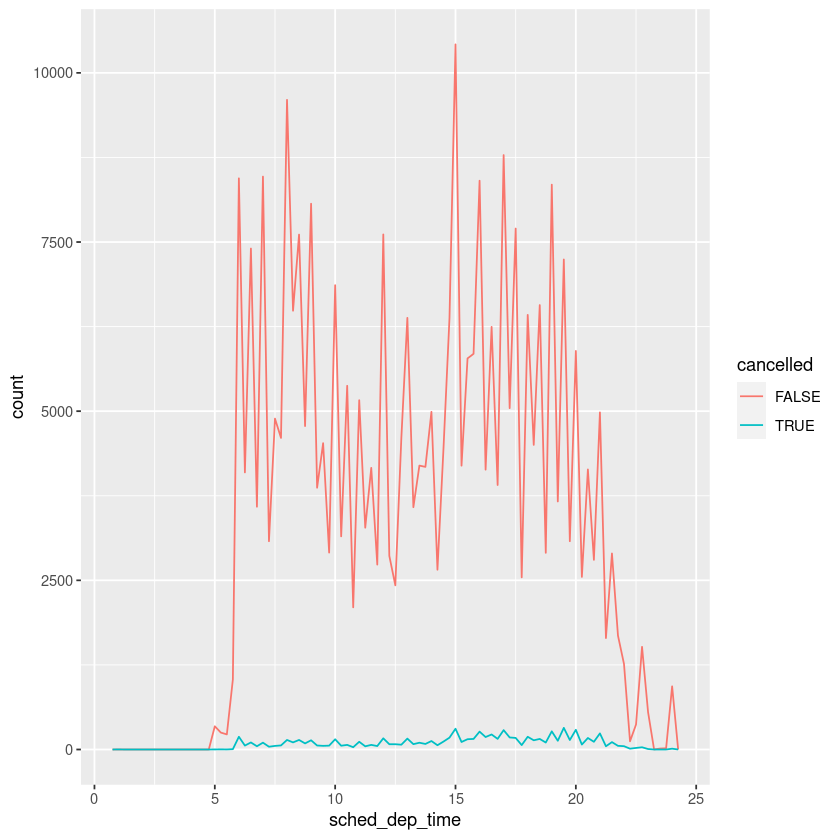

In [72]:
nycflights13::flights %>%
    mutate(cancelled = is.na(dep_time),
           sched_hour = sched_dep_time %/% 100,
           sched_min = sched_dep_time %% 100,
           sched_dep_time = sched_hour + sched_min / 60) %>%
    ggplot(mapping = aes(sched_dep_time)) +
        geom_freqpoly(mapping = aes(color = cancelled),
                      binwidth = 1/4)

However, this plot isn’t great because there are many more non-cancelled flights than cancelled flights. In the next section we’ll
explore some techniques for improving this comparison.

## __Covariation__

If variation describes the behavior within a variable, covariation
describes the behavior between variables. Covariation is the ten‐
dency for the values of two or more variables to vary together in a
related way. The best way to spot covariation is to visualize the relationship between two or more variables. How you do that should
again depend on the type of variables involved.

### A Categorical and Continuous Variable

It’s common to want to explore the distribution of a continuous
variable broken down by a categorical variable, as in the previous
frequency polygon. The default appearance of `geom_freqpoly()` is
not that useful for that sort of comparison because the height is
given by the count. That means if one of the groups is much smaller
than the others, it’s hard to see the differences in shape. For example,
let’s explore how the price of a diamond varies with its quality:

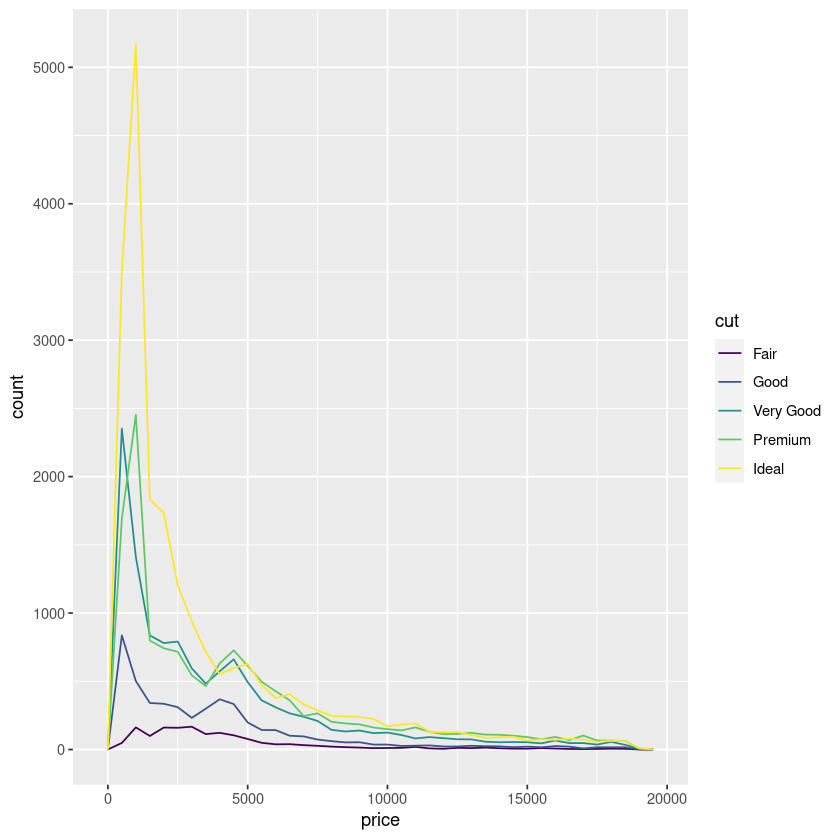

In [74]:
ggplot(data = diamonds,
       mapping = aes(x = price)) +
    geom_freqpoly(mapping = aes(color = cut),
                  binwidth = 500)

It’s hard to see the difference in distribution because the overall
counts differ so much:

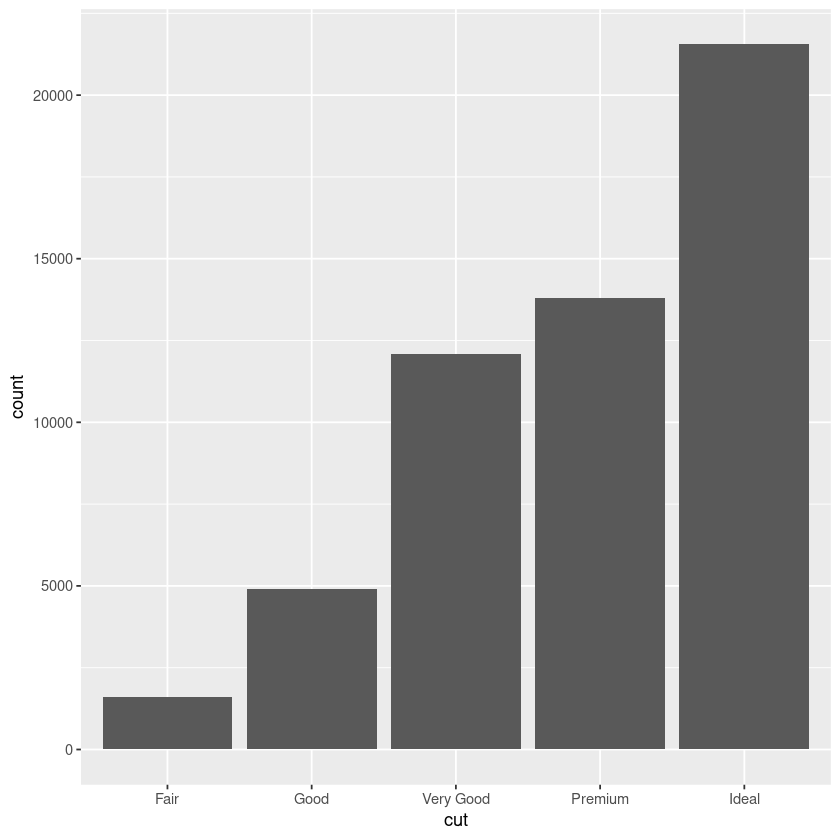

In [75]:
ggplot(diamonds) +
    geom_bar(mapping = aes(x = cut))

To make the comparison easier we need to swap what is displayed
on the y-axis. Instead of displaying count, we’ll display density,
which is the count standardized so that the area under each frequency polygon is one:

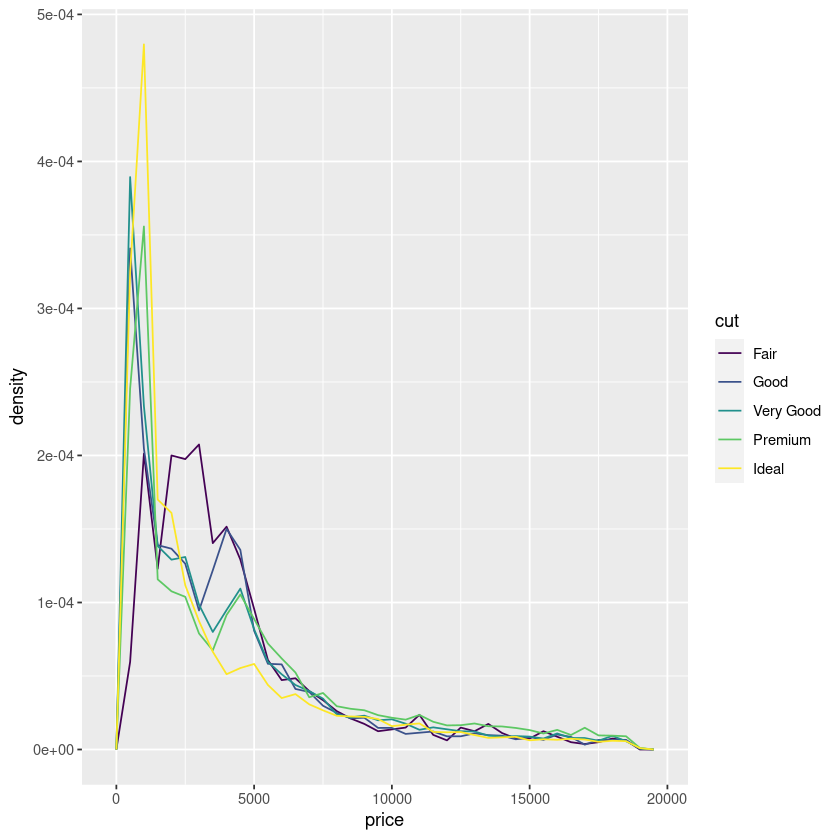

In [76]:
ggplot(data = diamonds,
       mapping = aes(x = price, y = ..density..)) +
    geom_freqpoly(mapping = aes(color = cut),
                  binwidth = 500)

Another alternative to display the distribution of a continuous variable broken down by a categorical variable is the boxplot. A boxplot
is a type of visual shorthand for a distribution of values that is popular among statisticians. Each boxplot consists of:

* A box that stretches from the 25th percentile of the distribution
to the 75th percentile, a distance known as the interquartile
range (IQR). In the middle of the box is a line that displays the
median, i.e., 50th percentile, of the distribution. These three
lines give you a sense of the spread of the distribution and
whether or not the distribution is symmetric about the median
or skewed to one side.

* Visual points that display observations that fall more than 1.5
times the IQR from either edge of the box. These outlying
points are unusual, so they are plotted individually.

* A line (or whisker) that extends from each end of the box and
goes to the farthest nonoutlier point in the distribution.

Let’s take a look at the distribution of price by cut using `geom_boxplot()` :

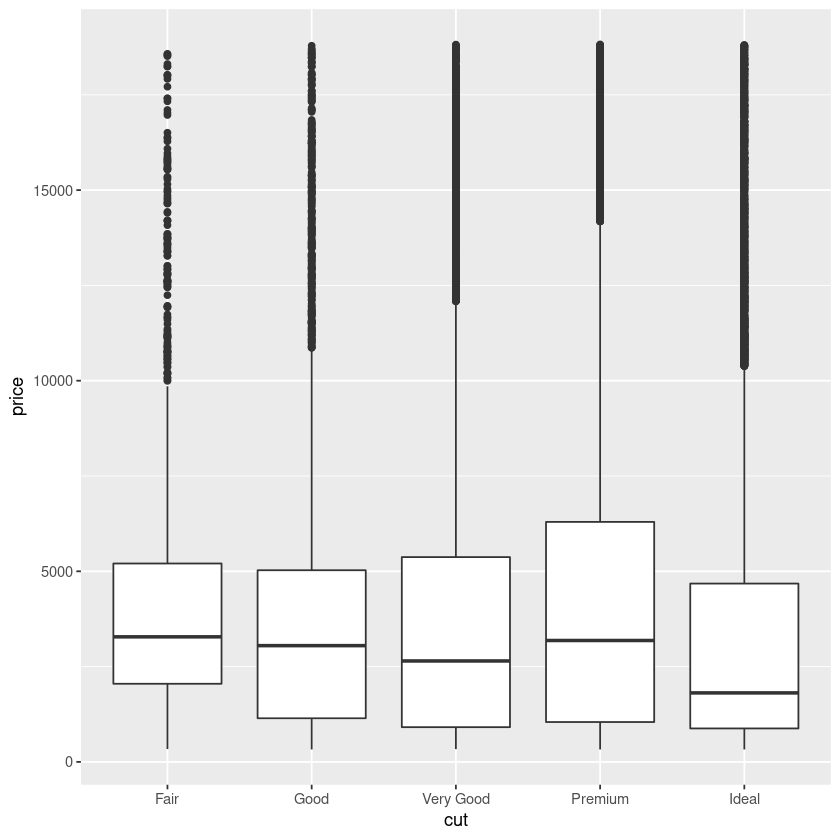

In [79]:
ggplot(data = diamonds,
       mapping = aes(x = cut, y = price)) +
    geom_boxplot()

cut is an ordered factor: fair is worse than good, which is worse
than very good, and so on. Many categorical variables don’t have
such an intrinsic order, so you might want to reorder them to make
a more informative display. One way to do that is with the
`reorder()` function.

For example, take the class variable in the mpg dataset. You might
be interested to know how highway mileage varies across classes:

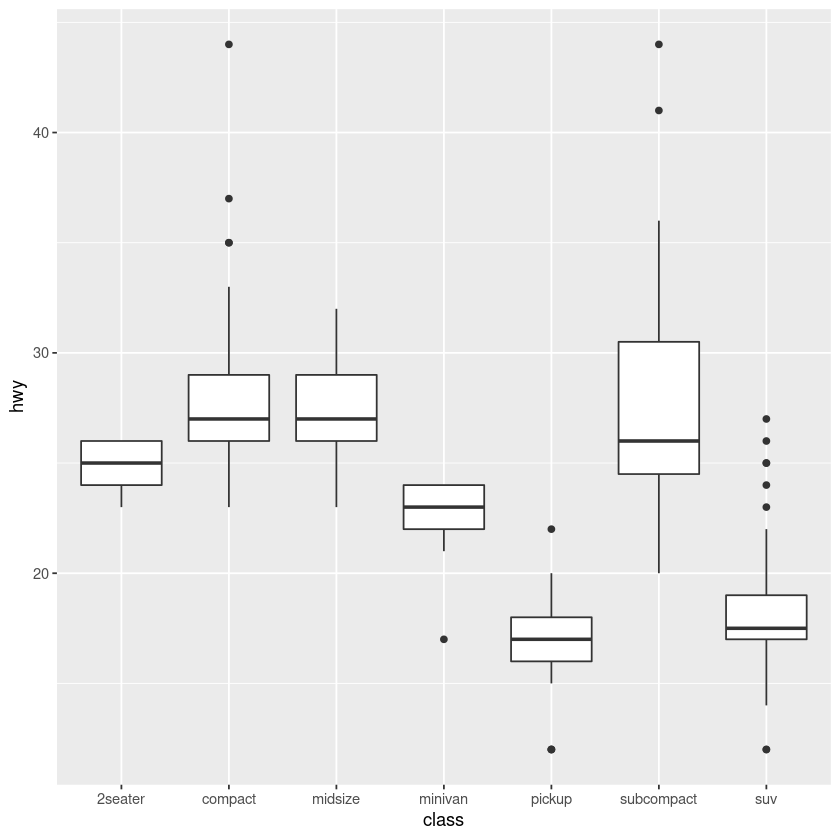

In [83]:
ggplot(data = mpg,
       mapping = aes(x = class, y = hwy)) +
    geom_boxplot()

To make the trend easier to see, we can reorder class based on the
median value of hwy :

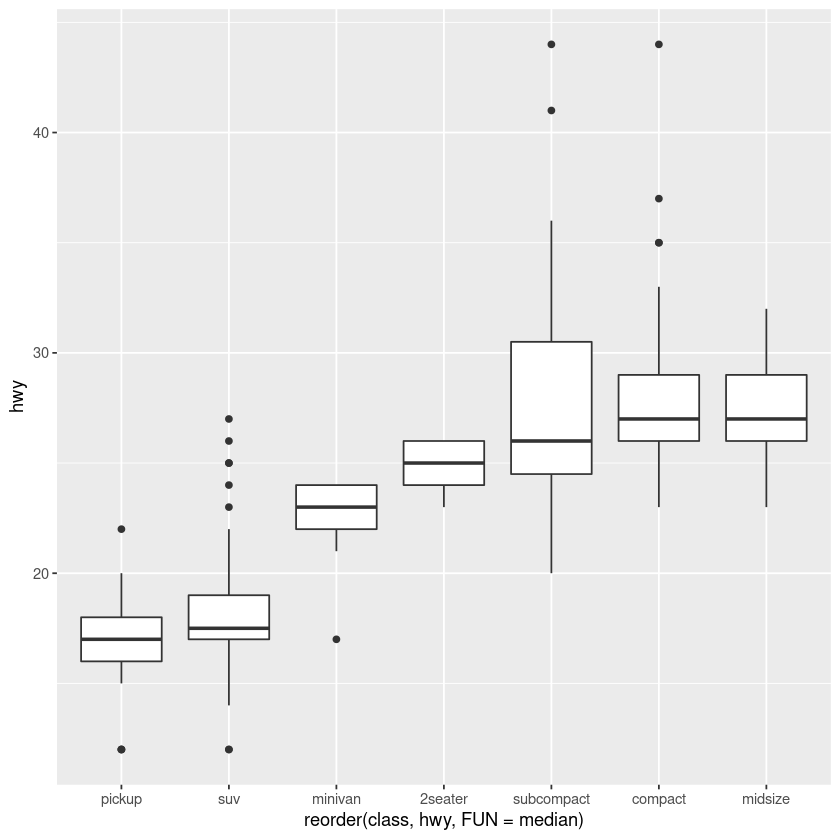

In [84]:
ggplot(data = mpg) +
    geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median),
                               y = hwy))

If you have long variable names, `geom_boxplot()` will work better if
you flip it 90°. You can do that with `coord_flip()` :

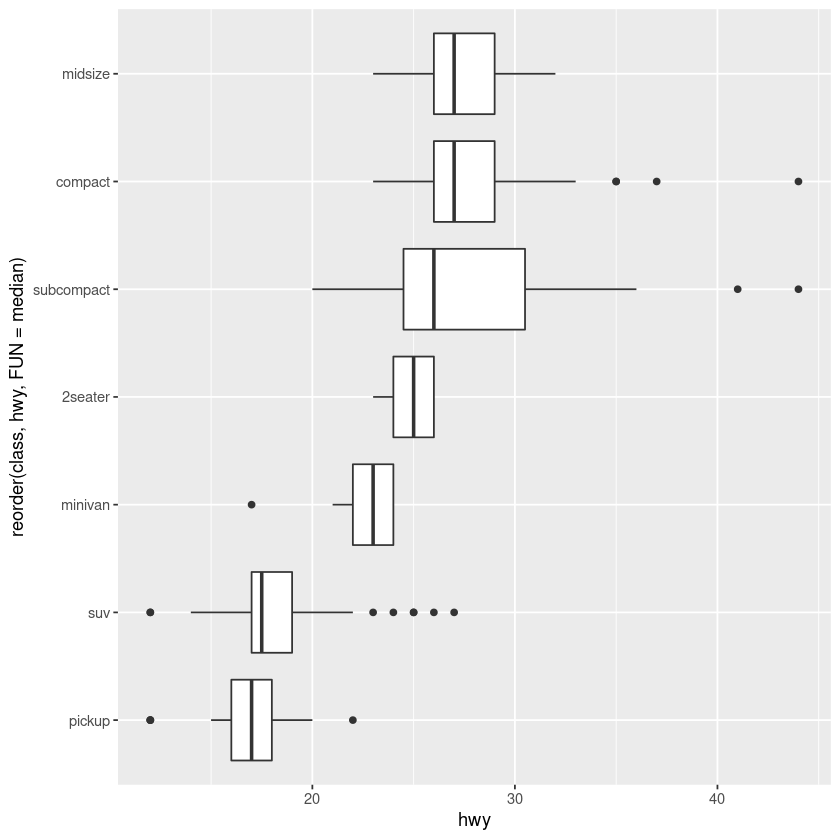

In [85]:
ggplot(data = mpg) +
    geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median),
                               y = hwy)) +
    coord_flip()

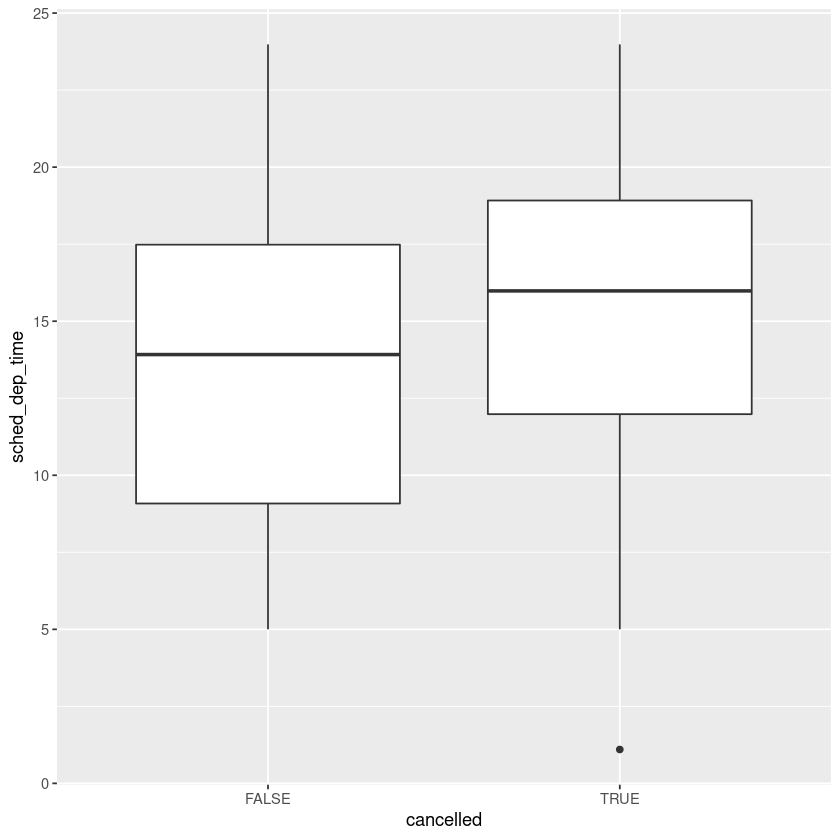

In [86]:
# Use what you’ve learned to improve the visualization
# of the departure times of cancelled vs. non-cancelled flights.
nycflights13::flights %>%
  mutate(cancelled = is.na(dep_time),
         sched_hour = sched_dep_time %/% 100,
         sched_min = sched_dep_time %% 100,
         sched_dep_time = sched_hour + sched_min / 60) %>%
  ggplot() +
  geom_boxplot(mapping = aes(x = cancelled,
                             y = sched_dep_time))

In [87]:
# What variable in the diamonds dataset is most important for
# predicting the price of a diamond? How is that variable correlated
# with cut? Why does the combination of those two relationships
# lead to lower quality diamonds being more expensive?
# I got this answer from https://jrnold.github.io/r4ds-exercise-solutions/exploratory-data-analysis.html


What are the general relationships of each variable with the price of the diamonds? I will consider the variables: carat, clarity, color, and cut. I ignore the dimensions of the diamond since carat measures size, and thus incorporates most of the information contained in these variables.

Since both price and carat are continuous variables, I use a scatter plot to visualize their relationship.

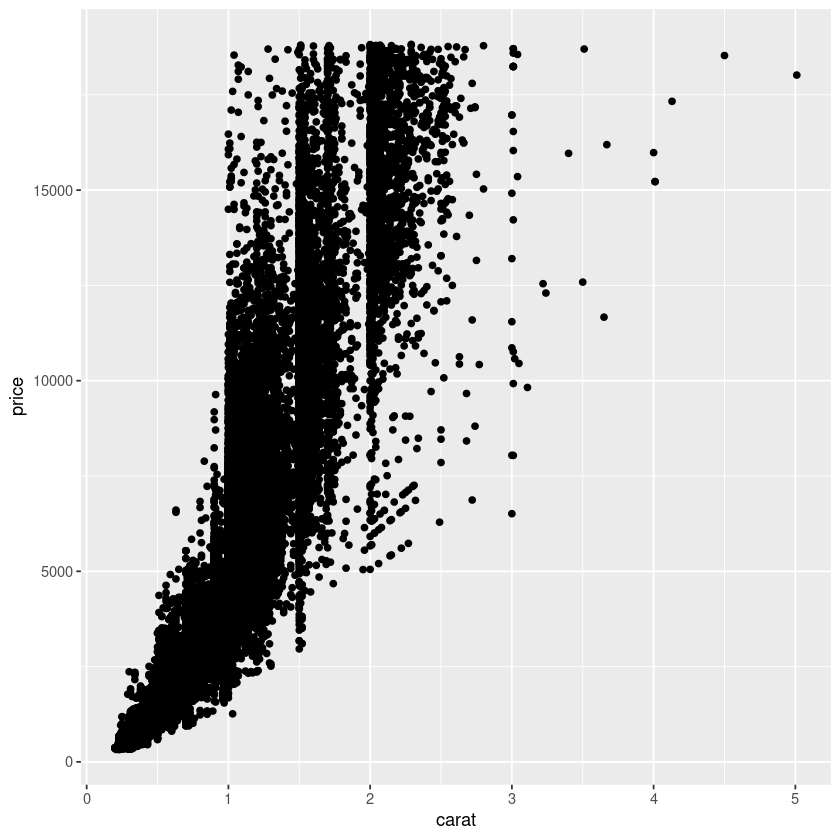

In [88]:
ggplot(diamonds,
       aes(x = carat, y = price)) +
  geom_point()

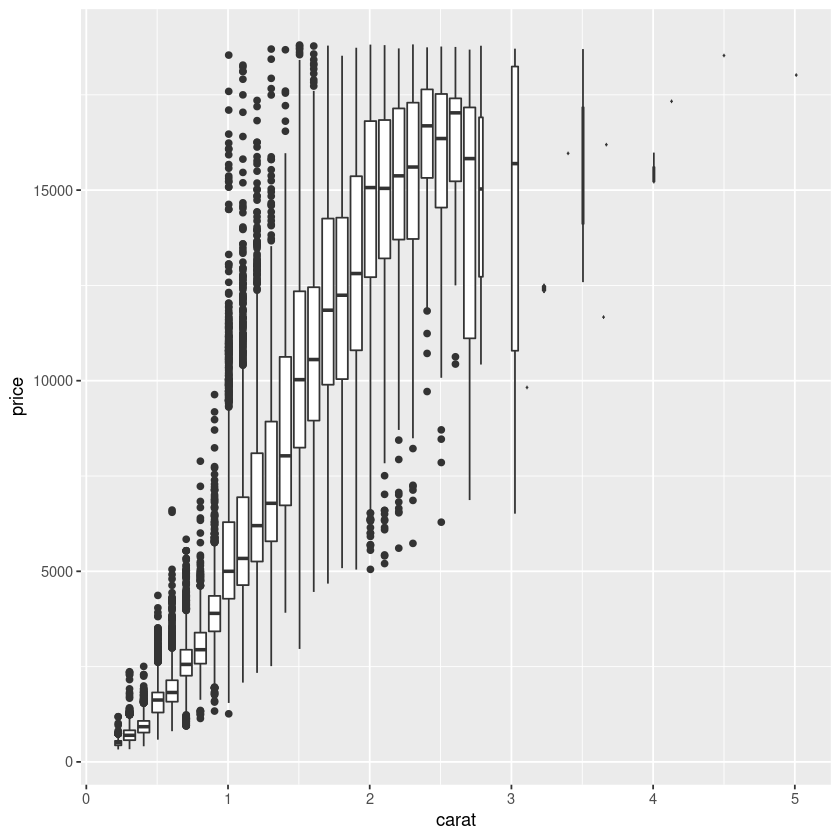

In [89]:
ggplot(data = diamonds, mapping = aes(x = carat, y = price)) +
  geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)), orientation = "x")

The variables color and clarity are ordered categorical variables. The chapter suggests visualizing a categorical and continuous variable using frequency polygons or boxplots. In this case, I will use a box plot since it will better show a relationship between the variables.

There is a weak negative relationship between color and price. The scale of diamond color goes from D (best) to J (worst). Currently, the levels of diamonds$color are in the wrong order. Before plotting, I will reverse the order of the color levels so they will be in increasing order of quality on the x-axis. 

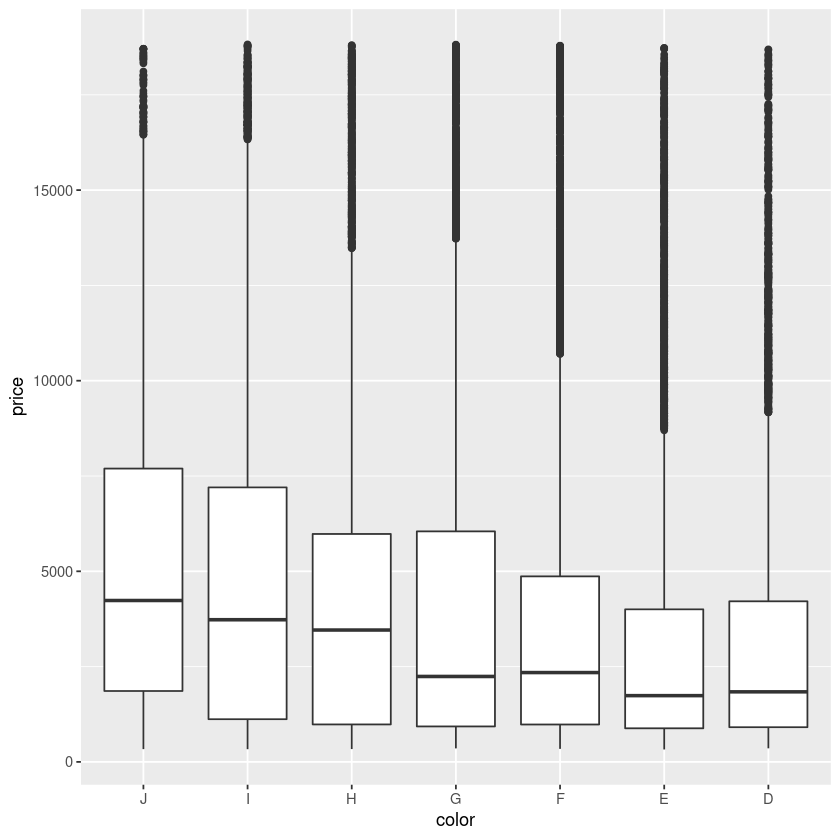

In [90]:
diamonds %>%
  mutate(color = fct_rev(color)) %>%
  ggplot(aes(x = color, y = price)) +
  geom_boxplot()

There is also weak negative relationship between clarity and price. The scale of clarity goes from I1 (worst) to IF (best).

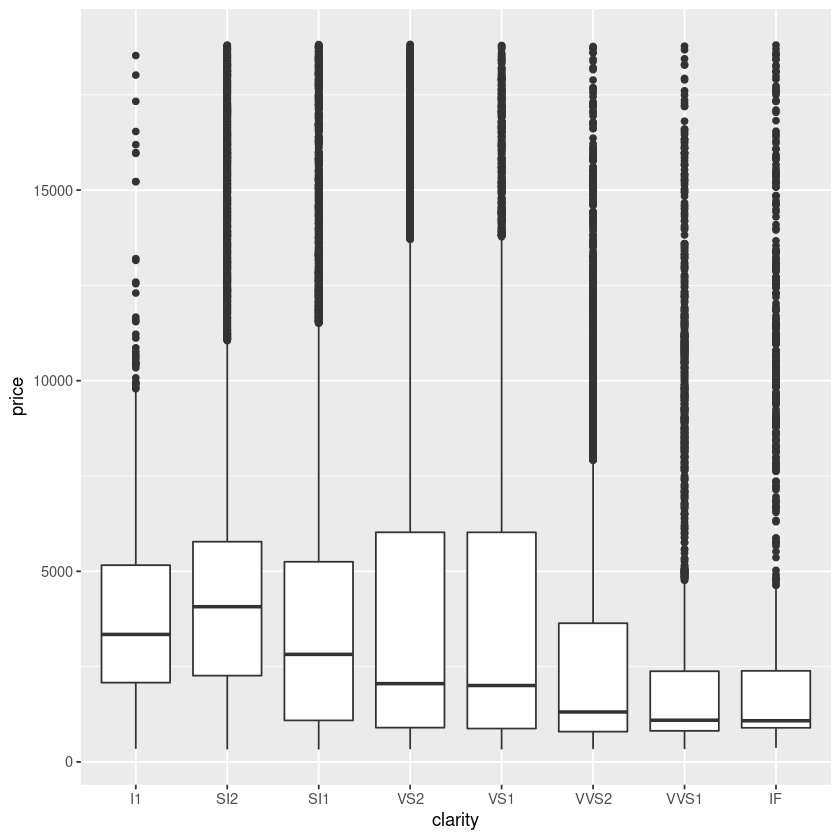

In [91]:
ggplot(data = diamonds) +
  geom_boxplot(mapping = aes(x = clarity, y = price))

For both clarity and color, there is a much larger amount of variation within each category than between categories. Carat is clearly the single best predictor of diamond prices.

Now that we have established that carat appears to be the best predictor of price, what is the relationship between it and cut? Since this is an example of a continuous (carat) and categorical (cut) variable, it can be visualized with a box plot.

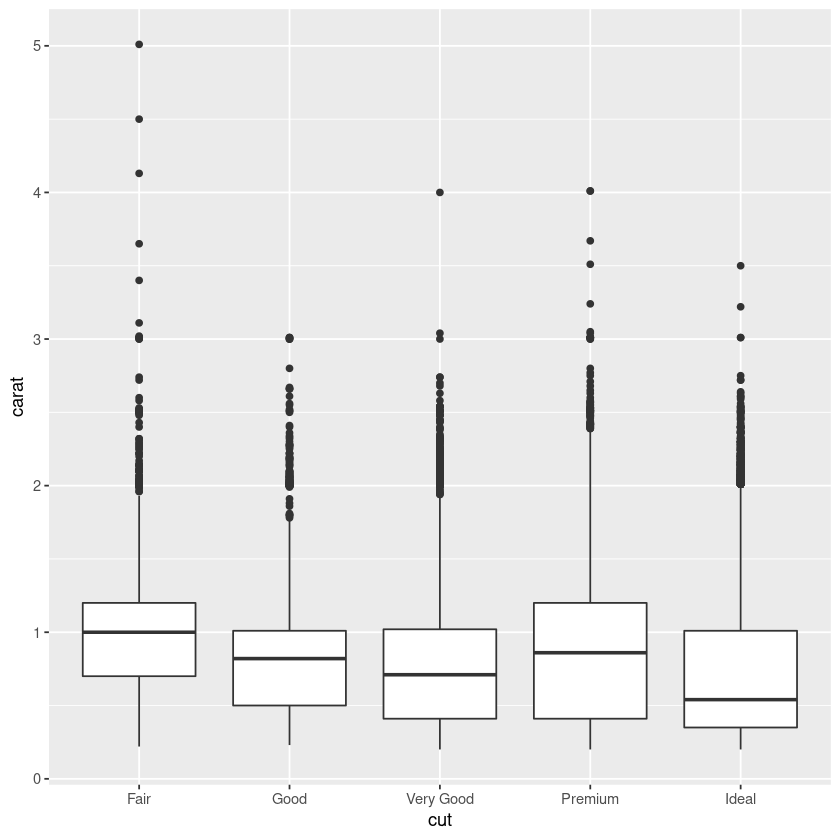

In [92]:
ggplot(diamonds, aes(x = cut, y = carat)) +
  geom_boxplot()

There is a lot of variability in the distribution of carat sizes within each cut category. There is a slight negative relationship between carat and cut. Noticeably, the largest carat diamonds have a cut of “Fair” (the lowest).

This negative relationship can be due to the way in which diamonds are selected for sale. A larger diamond can be profitably sold with a lower quality cut, while a smaller diamond requires a better cut

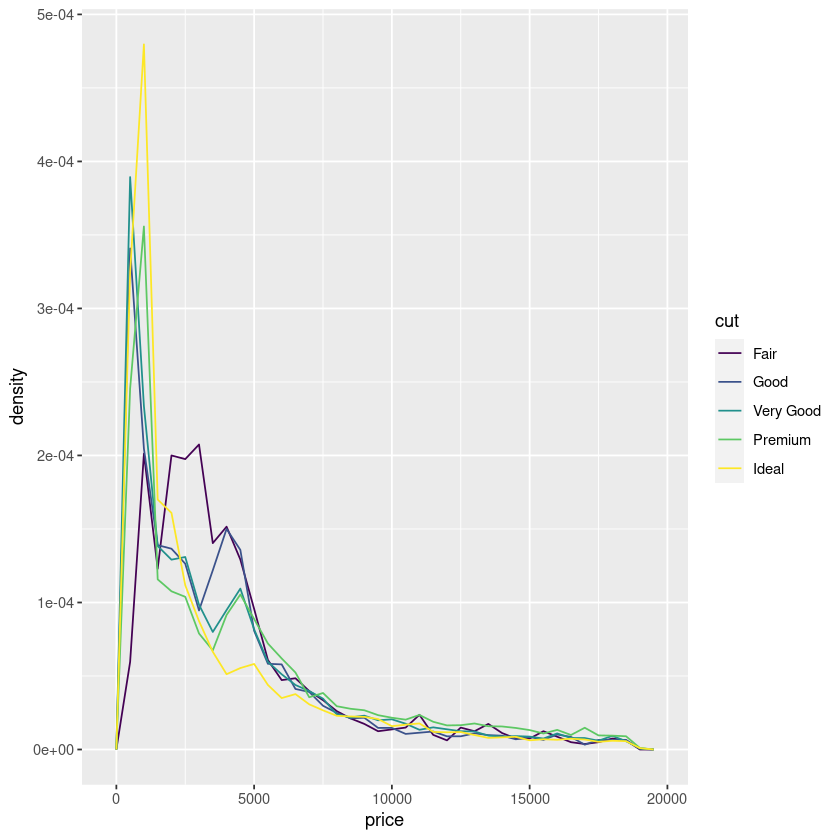

In [97]:
# Compare and contrast geom_violin() with a faceted geom_histogram(),
# or a colored geom_freqpoly(). What are the pros and cons of each method?
ggplot(data = diamonds,
       mapping = aes(x = price, y = ..density..)) +
  geom_freqpoly(mapping = aes(color = cut),
                binwidth = 500)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



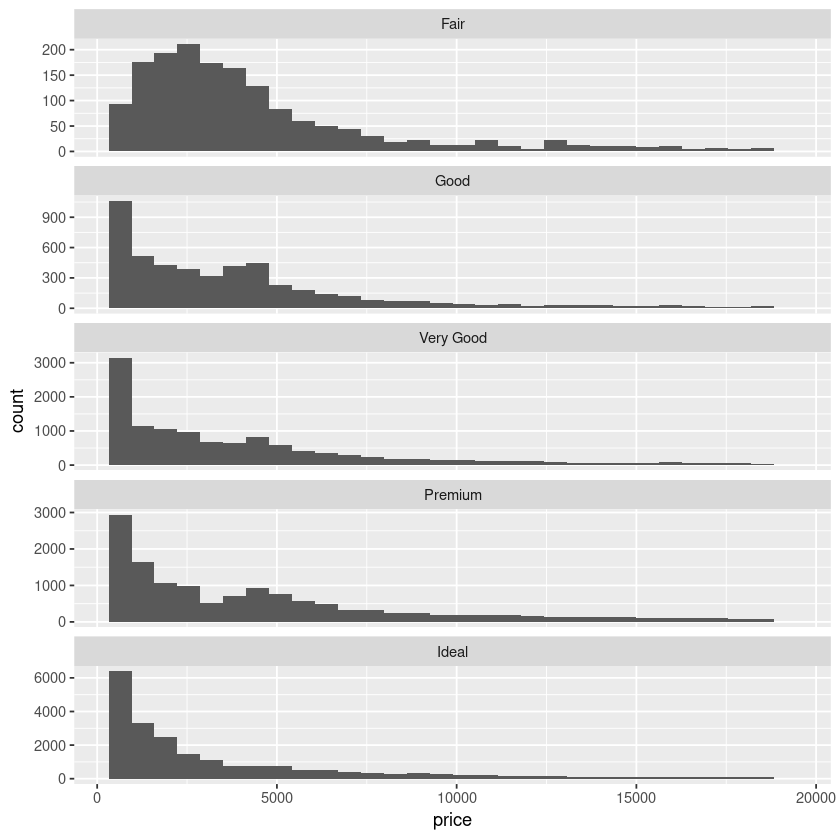

In [98]:
ggplot(data = diamonds, mapping = aes(x = price)) +
  geom_histogram() +
  facet_wrap(~cut, ncol = 1, scales = "free_y")

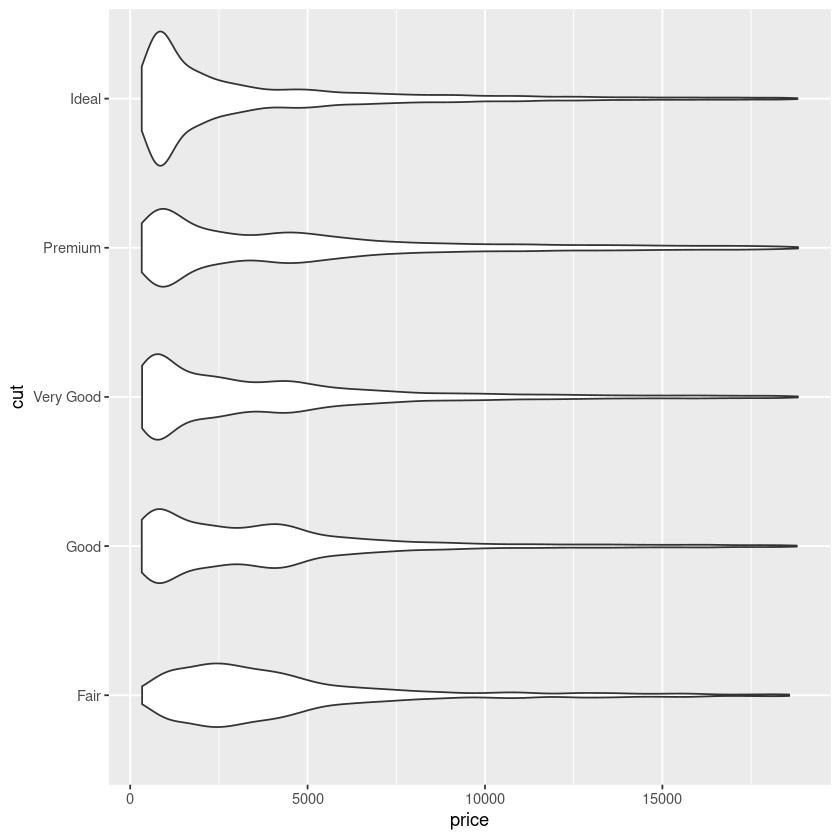

In [99]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_violin() +
  coord_flip()

In [123]:
library(ggbeeswarm)

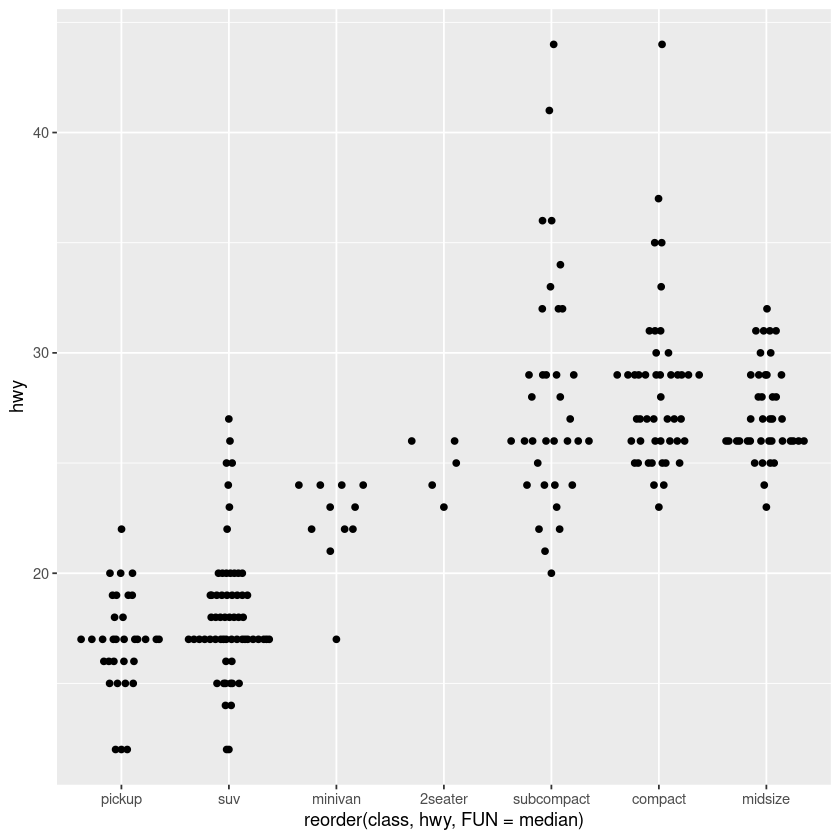

In [124]:
# If you have a small dataset, it’s sometimes useful to use geom_jitter()
# to see the relationship between a continuous and categorical variable.
# The ggbeeswarm package provides a number of methods similar to geom_jitter().
# List them and briefly describe what each one does.
ggplot(data = mpg) +
  geom_quasirandom(mapping = aes(x = reorder(class, hwy, FUN = median),
                                 y = hwy))

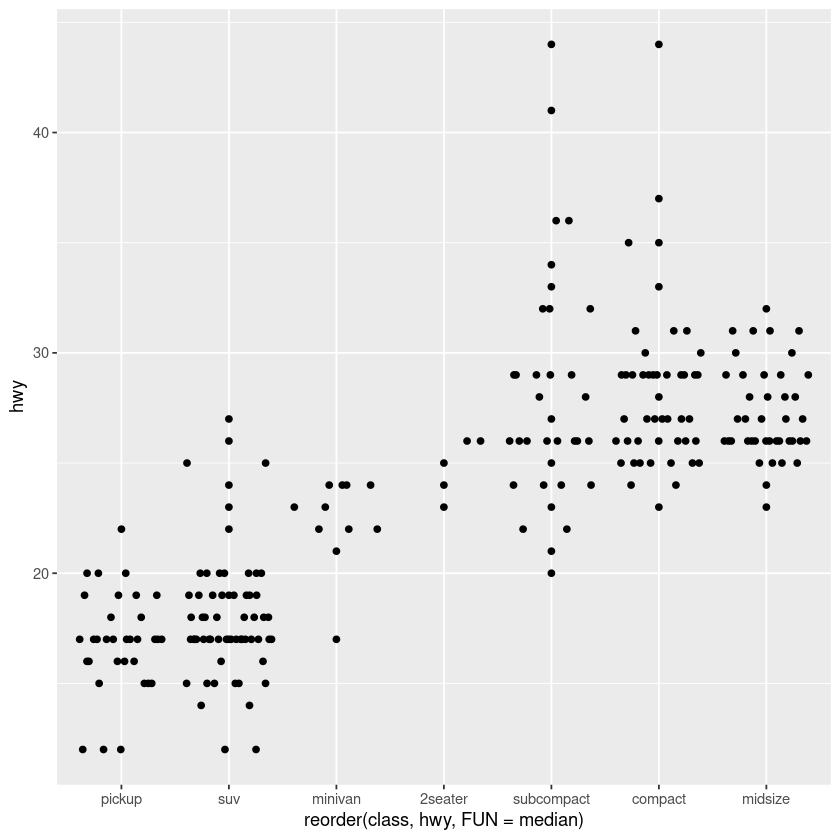

In [125]:
ggplot(data = mpg) +
  geom_quasirandom(mapping = aes(x = reorder(class, hwy, FUN = median),
                                 y = hwy),
                   method = "tukey")

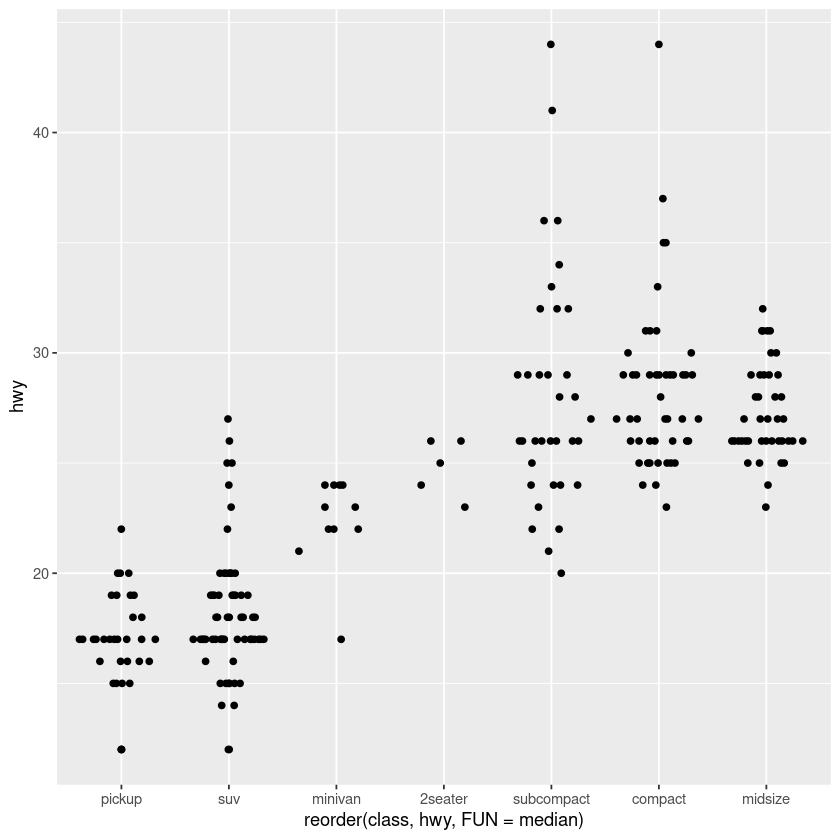

In [126]:
ggplot(data = mpg) +
  geom_quasirandom(mapping = aes(x = reorder(class, hwy, FUN = median),
                                 y = hwy),
                   method = "tukeyDense")

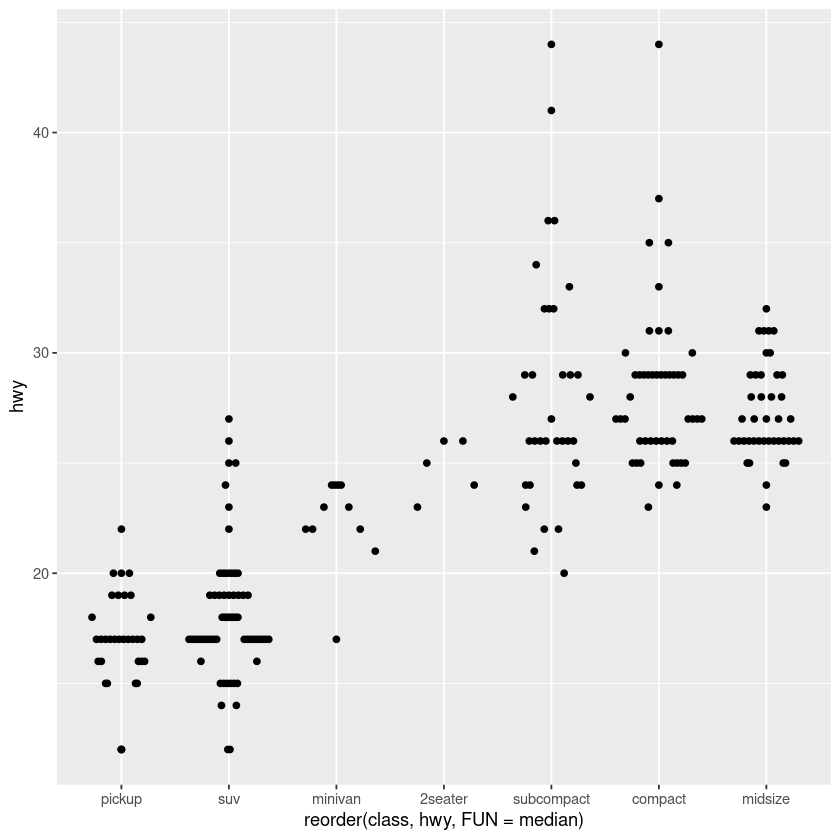

In [127]:
ggplot(data = mpg) +
  geom_quasirandom(mapping = aes(x = reorder(class, hwy, FUN = median),
                                 y = hwy),
                   method = "frowney")

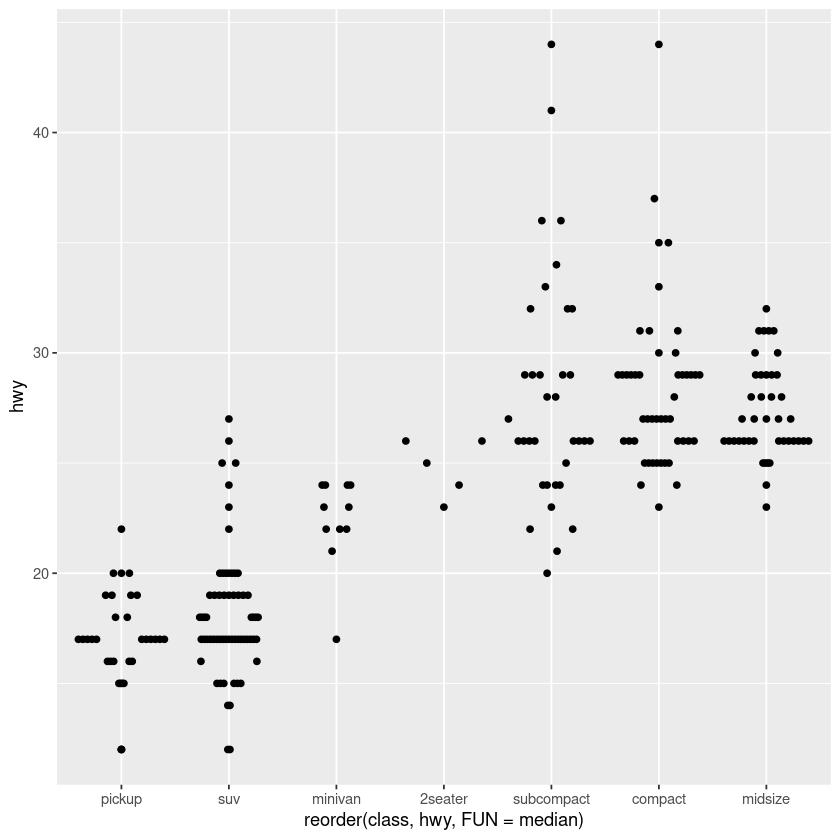

In [129]:
ggplot(data = mpg) +
    geom_quasirandom(mapping = aes(x = reorder(class, hwy, FUN = median),
                                 y = hwy),
                   method = "smiley")

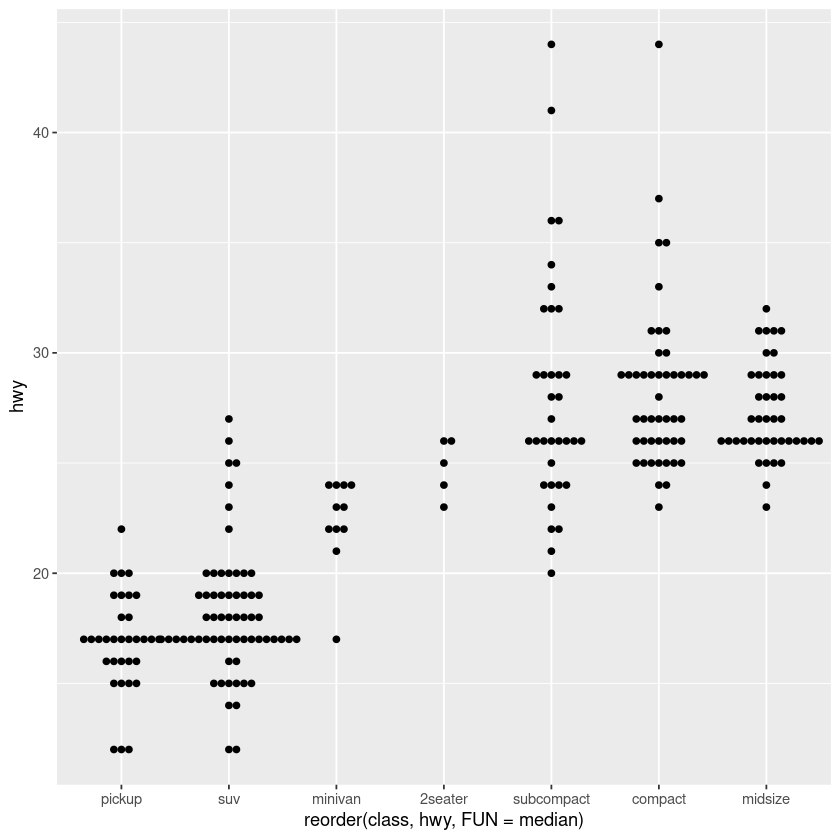

In [130]:
ggplot(data = mpg) +
    geom_beeswarm(mapping = aes(x = reorder(class, hwy, FUN = median),
                                y = hwy))

### __Two categorical Values__

To visualize the covariation between categorical variables, you’ll
need to count the number of observations for each combination.
One way to do that is to rely on the built-in `geom_count()` :

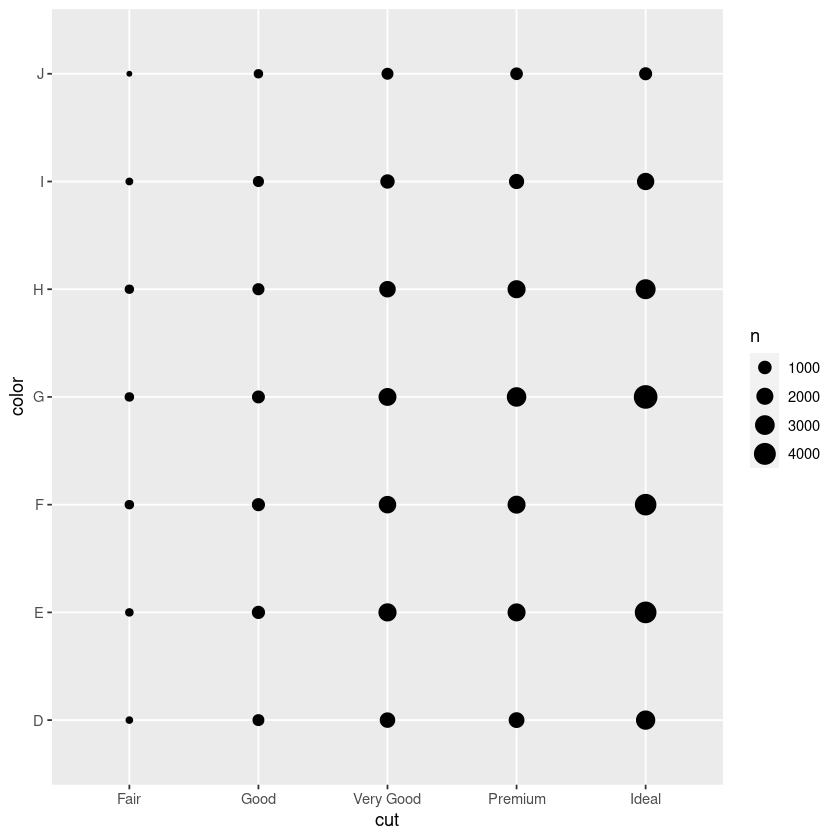

In [94]:
ggplot(data = diamonds) +
    geom_count(mapping = aes(x = cut, y = color))

The size of each circle in the plot displays how many observations
occurred at each combination of values. Covariation will appear as a
strong correlation between specific x values and specific y values.
Another approach is to compute the count with dplyr:

In [95]:
diamonds %>%
    count(color, cut)

color,cut,n
<ord>,<ord>,<int>
D,Fair,163
D,Good,662
D,Very Good,1513
⋮,⋮,⋮
J,Very Good,678
J,Premium,808
J,Ideal,896


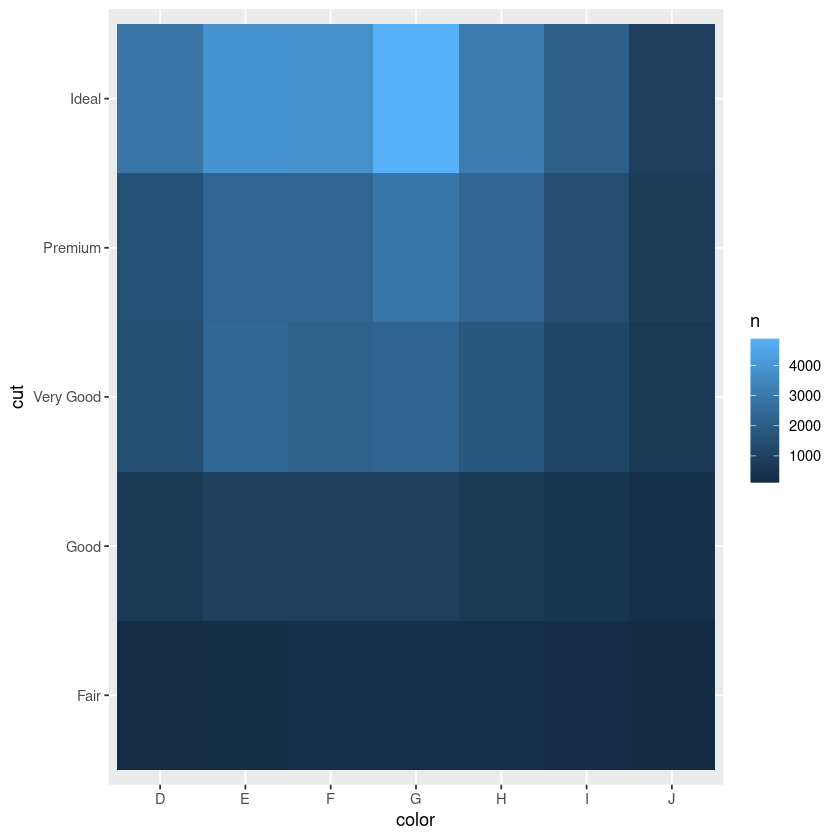

In [96]:
diamonds %>%
    count(color, cut) %>%
    ggplot(mapping = aes(x = color, y = cut)) +
        geom_tile(mapping = aes(fill = n))

If the categorical variables are unordered, you might want to use the
seriation package to simultaneously reorder the rows and columns
in order to more clearly reveal interesting patterns. For larger plots,
you might want to try the d3heatmap or heatmaply packages,
which create interactive plots.

### __Two Continuous Variables__

You’ve already seen one great way to visualize the covariation
between two continuous variables: draw a scatterplot with
`geom_point()` . You can see covariation as a pattern in the points.
For example, you can see an exponential relationship between the
carat size and price of a diamond:

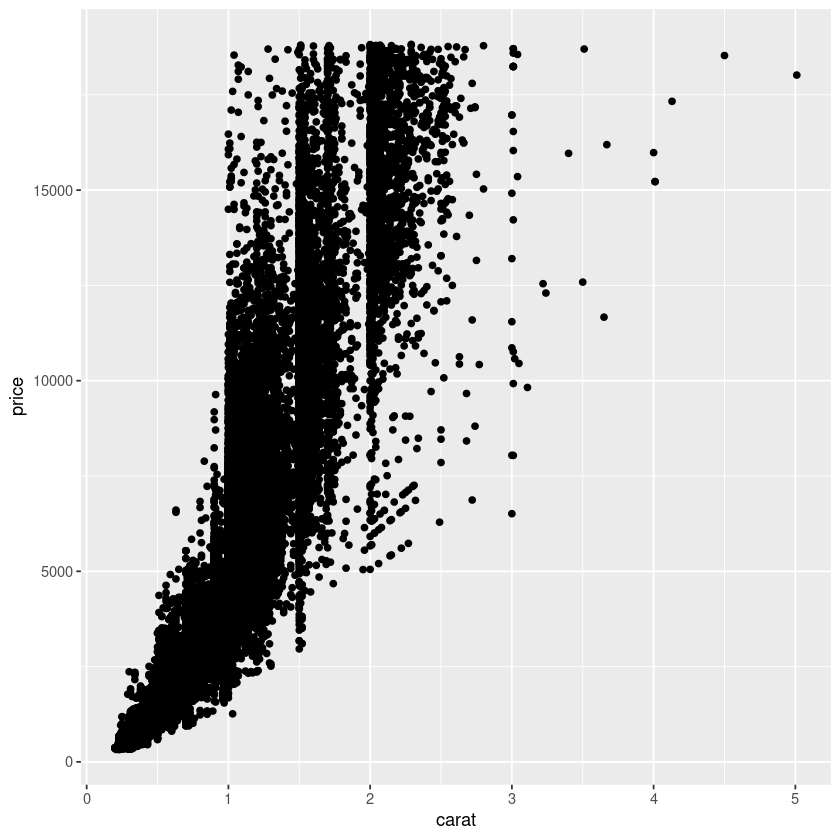

In [100]:
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = carat, y = price))

Scatterplots become less useful as the size of your dataset grows,
because points begin to overplot, and pile up into areas of uniform
black (as in the preceding scatterplot). You’ve already seen one way
to fix the problem, using the alpha aesthetic to add transparency:

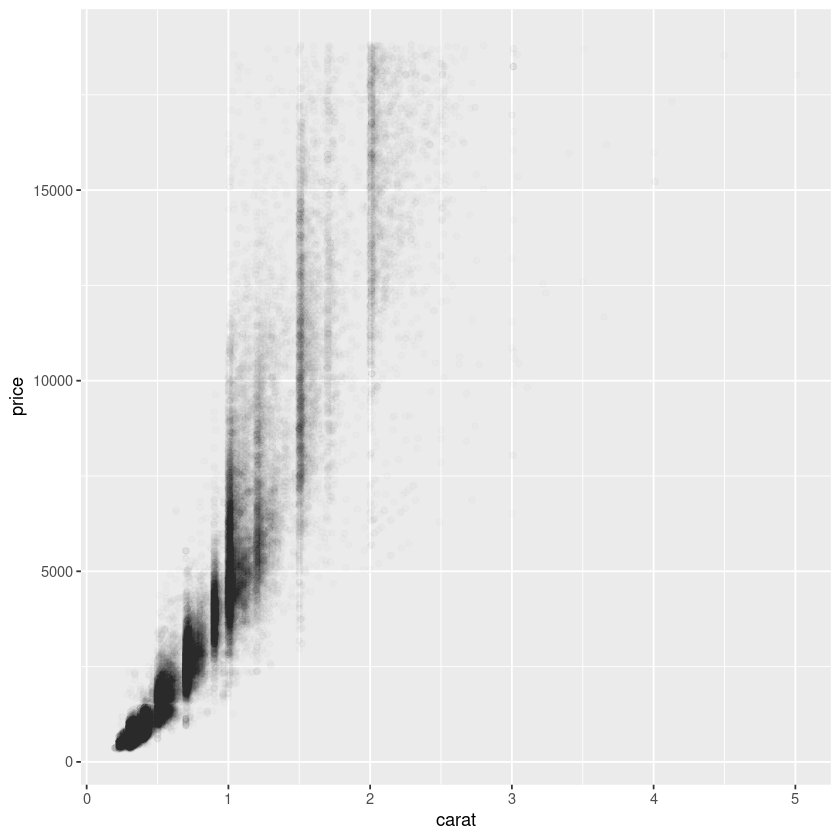

In [110]:
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = carat,
                             y = price),
               alpha = 0.01)

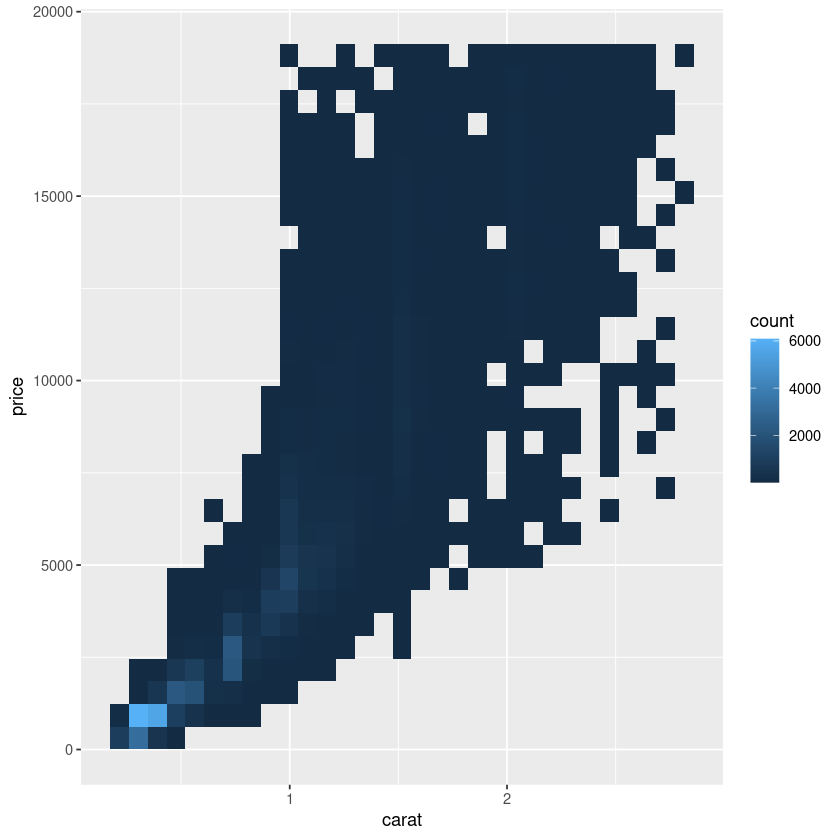

In [112]:
ggplot(data = smaller) +
    geom_bin2d(mapping = aes(x = carat, y = price))

Another option is to bin one continuous variable so it acts like a cat‐
egorical variable. Then you can use one of the techniques for visual‐
izing the combination of a categorical and a continuous variable that
you learned about. For example, you could bin carat and then for
each group, display a boxplot:

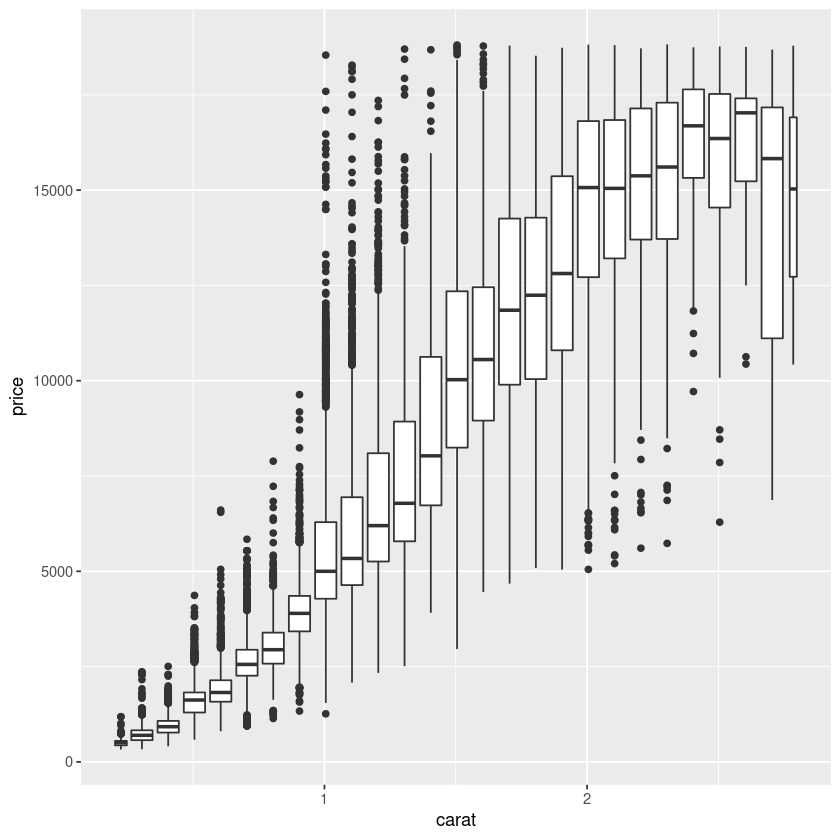

In [113]:
ggplot(data = smaller,
       mapping = aes(x = carat, y = price)) +
    geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)))

In [114]:
?cut_width

cut_interval {ggplot2},R Documentation
x,numeric vector
n,"number of intervals to create, OR"
length,length of each interval
...,"Arguments passed on to base::cut.default breakseither a numeric vector of two or more unique cut points or a single number (greater than or equal to 2) giving the number of intervals into which x is to be cut. labelslabels for the levels of the resulting category. By default, labels are constructed using ""(a,b]"" interval notation. If labels = FALSE, simple integer codes are returned instead of a factor. rightlogical, indicating if the intervals should be closed on the right (and open on the left) or vice versa. dig.labinteger which is used when labels are not given. It determines the number of digits used in formatting the break numbers. ordered_resultlogical: should the result be an ordered factor?"
width,The bin width.
"center, boundary","Specify either the position of edge or the center of a bin. Since all bins are aligned, specifying the position of a single bin (which doesn't need to be in the range of the data) affects the location of all bins. If not specified, uses the ""tile layers algorithm"", and sets the boundary to half of the binwidth. To center on integers, width = 1 and center = 0. boundary = 0.5."
closed,"One of ""right"" or ""left"" indicating whether right or left edges of bins are included in the bin."


`cut_width(x, width)` , as used here, divides x into bins of width
width . By default, boxplots look roughly the same (apart from the
number of outliers) regardless of how many observations there are
so it’s difficult to tell that each boxplot summarizes a different number of points. One way to show that is to make the width of the boxplot proportional to the number of points with `varwidth = TRUE` .
Another approach is to display approximately the same number of
points in each bin. That’s the job of `cut_number()` :

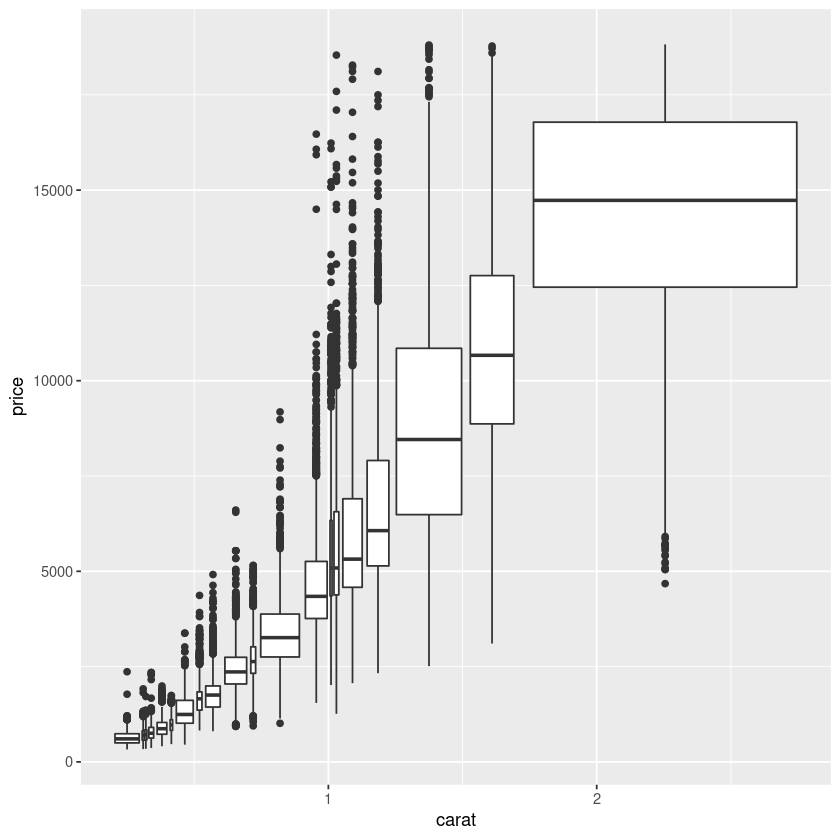

In [115]:
ggplot(data = smaller,
       mapping = aes(x = carat,
                     y = price)) +
    geom_boxplot(mapping = aes(group = cut_number(carat, 20)))

## __Patterns and Models__